## Problem Statement

Prediction of bankruptcy is a phenomenon of increasing interest to firms who
stand to loose money because on unpaid debts. Since computers can store huge dataset
pertaining to bankruptcy making accurate predictions from them before hand is becoming
important. 

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

 In this project you will use various classification algorithms on bankruptcy
dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Attribute Information**

Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

Y - Bankrupt?: Class label 1 : Yes , 0: No 

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

## Importing the libraries

In [566]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score, accuracy_score,precision_score, classification_report, roc_auc_score, roc_curve,f1_score
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,KMeansSMOTE,SMOTENC
from scipy import stats

# Data Preparation

Importing Dataset and examining the properties of the dataset

In [478]:
# reading the csv file from pandas library
bank_data=pd.read_csv('COMPANY BANKRUPTCY PREDICTION.csv') 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [479]:
# Print the first 5 rows of the dataframe
bank_data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [480]:
bank_data.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  \
6814                                      0.303510   
6815                                      0.303520   
6816                                      0.303512   
6817                                      0.303498   
6818                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
6814                               0.781588             1.510213e-04   
6815                               0.781586             5.220000e+09   
6816                               0.781546             2.509312e-04   
6817                               0.781663             1.236154e-04   
6818                               0.786079             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.181294   
6818                          5.900000e+08       0.000000   

       Net Value Per Share (B)   Net Value Per Share (A)  \
6814                  0.175045                  0.175045   
6815                  0.181324                  0.181324   
6816                  0.269521                  0.269521   
6817                  0.213392                  0.213392   
6818                  0.220766                  0.220766   

       Net Value Per Share (C)   Persiste

In [481]:
target_counts=bank_data["Bankrupt?"].value_counts()
target_counts

0    6599
1     220
Name: Bankrupt?, dtype: int64

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

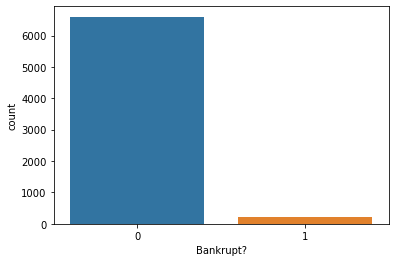

In [482]:
sns.countplot(bank_data['Bankrupt?'])

- Its highly imbalanced Dataset with ratio of **3 : 97**

In [483]:
bank_data.info() # to know the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are around 96 columns in the dataset with **93 of them being float** and ***3 being int***.

In [484]:
bank_data.shape # printing the shape of the dataframe

(6819, 96)

Data set has 96 columns and 6819 rows

In [485]:
bank_data.describe()# to know the statistical summary of the dataframe

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

## Checking for categorical Variables

In [486]:

for i in  bank_data.describe().columns:
    # print(len(bank_data[i].unique()) )
    if len(bank_data[i].unique()) < 10:
        print(i,'with',len(bank_data[i].unique()),'values')


Bankrupt? with 2 values
 Liability-Assets Flag with 2 values
 Net Income Flag with 1 values


 - Liability-Assets Flag has only two values: 1 and 0
 - Net Income Flag has only one value: 1
 - Bankrupt? is a target variable

In [487]:
print(bank_data[' Net Income Flag'].unique())
# Drop the columns Net Income Flag which is not required
bank_data.drop([' Net Income Flag'],axis=1,inplace=True)

[1]


Net Income Flag has only one unique value which is 1 in it

## Checking for Missing values 

In [488]:
pd.DataFrame(data=bank_data.isna().mean()*100,index=bank_data.columns).T

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0        0.0                                                0.0          

    ROA(A) before interest and % after tax  \
0                                      0.0   

    ROA(B) before interest and depreciation after tax  \
0                                                0.0    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                      0.0                           0.0   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                     0.0                         0.0   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                           0.0                                           0.0   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                                    0.0                      0.0   

    Research and development expense rate   Cash flow rate  \
0                                     0.0              0.0   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                                   0.0            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                       0.0                       0.0   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                       0.0                                       0.0   

    Cash Flow Per Share   Revenue Per Share (Yuan ¥)  \
0                   0.0                          0.0   

    Operating Profit Per Share (Yuan ¥)  \
0                                   0.0   

    Per Share Net profit before tax (Yuan ¥)  \
0                                        0.0   

    Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
0                                       0.0                            0.0   

    After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate  \
0                                0.0                              0.0   

    Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
0                                 0.0                       0.0   

    Net Value Growth Rate   Total Asset Return Growth Rate Ratio  \
0                     0.0                                    0.0   

    Cash Reinvestment %   Current Ratio   Quick Ratio  \
0                   0.0             0.0           0.0   

    Interest Expense Ratio   Total debt/Total net worth   Debt ratio %  \
0                      0.0                          0.0            0.0   

    Net worth/Assets   Long-term fund suitability ratio (A)  \
0                0.0                                    0.0   

    Borrowing dependency   Contingent liabilities/Net worth  \
0                    0.0                                0.0   

    Operating profit/Paid-in capital   Net profit before tax/Paid-in capital  \
0                                0.0                                     0.0   

    Inventory and accounts receivable/Net value   Total Asset Turnover  \
0                                           0.0                    0.0   

    Accounts Receivable Turnover   Average Collection Days  \
0                            0.0                       0.0   

    Inventory Turnover Rate (times)   Fixed Assets Turnover Frequency  \
0                               0.0                               0.0   

    Net Worth Turnover Rate (times)   Revenue per person  \
0                               0.0                  0.0   

    Operating profit per person   Allocation rate per person  \
0                           0.0                          0.0   

    Working Capital to Total Assets   Quick Assets/Total Assets  \
0                               0.0                         0.0   

    Current Assets/Total Assets   Cash/Total Assets  \
0                           0.0                 0.0   

    Quick Assets/Current Liability   Cash/Current Liability  \
0                              0.0                      0.0   

    Curr

In [489]:
bank_data.isna().sum().sum()

0

We can see that there are no missing values in the dataset

There is no missing data

### Identifying numerical columns

In [490]:
numerical_columns=[x for x in bank_data.columns if x not in [' Net Income Flag','Bankrupt?'] ]
numerical_columns

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net 

In [491]:
from IPython.display import display
def display_quatile_dist(data,features):
    a=pd.DataFrame()
    r=[0,.01,.1,.25,.5,.75,.9,.99,1]
    for i in features :
#     display(bank_data[i].quantile(r))
        a[i]=data[i].quantile(r)
    
    display(a.style.bar())
    
display_quatile_dist(bank_data,numerical_columns)

- By this above table we can visualize how the value of features fluctuate
- And we can also check where we can expect outliers
- Magnitude of feature like 
    1. **Research and development expense rate** 
    2. **Interest-bearing debt interest rate**
    3. **Operating Expense Rate**
    4. **Total Asset Growth Rate**
    5. **Inventory Turnover Rate (times)**
    6. **Turnover Frequency**
    7. **Cash Turn Over Rate** 

are high compared to other features

## Feature Elimination :  from correlation  (Pearson correlation)
 - Eliminating features have correlation between more than .85  

<AxesSubplot:>

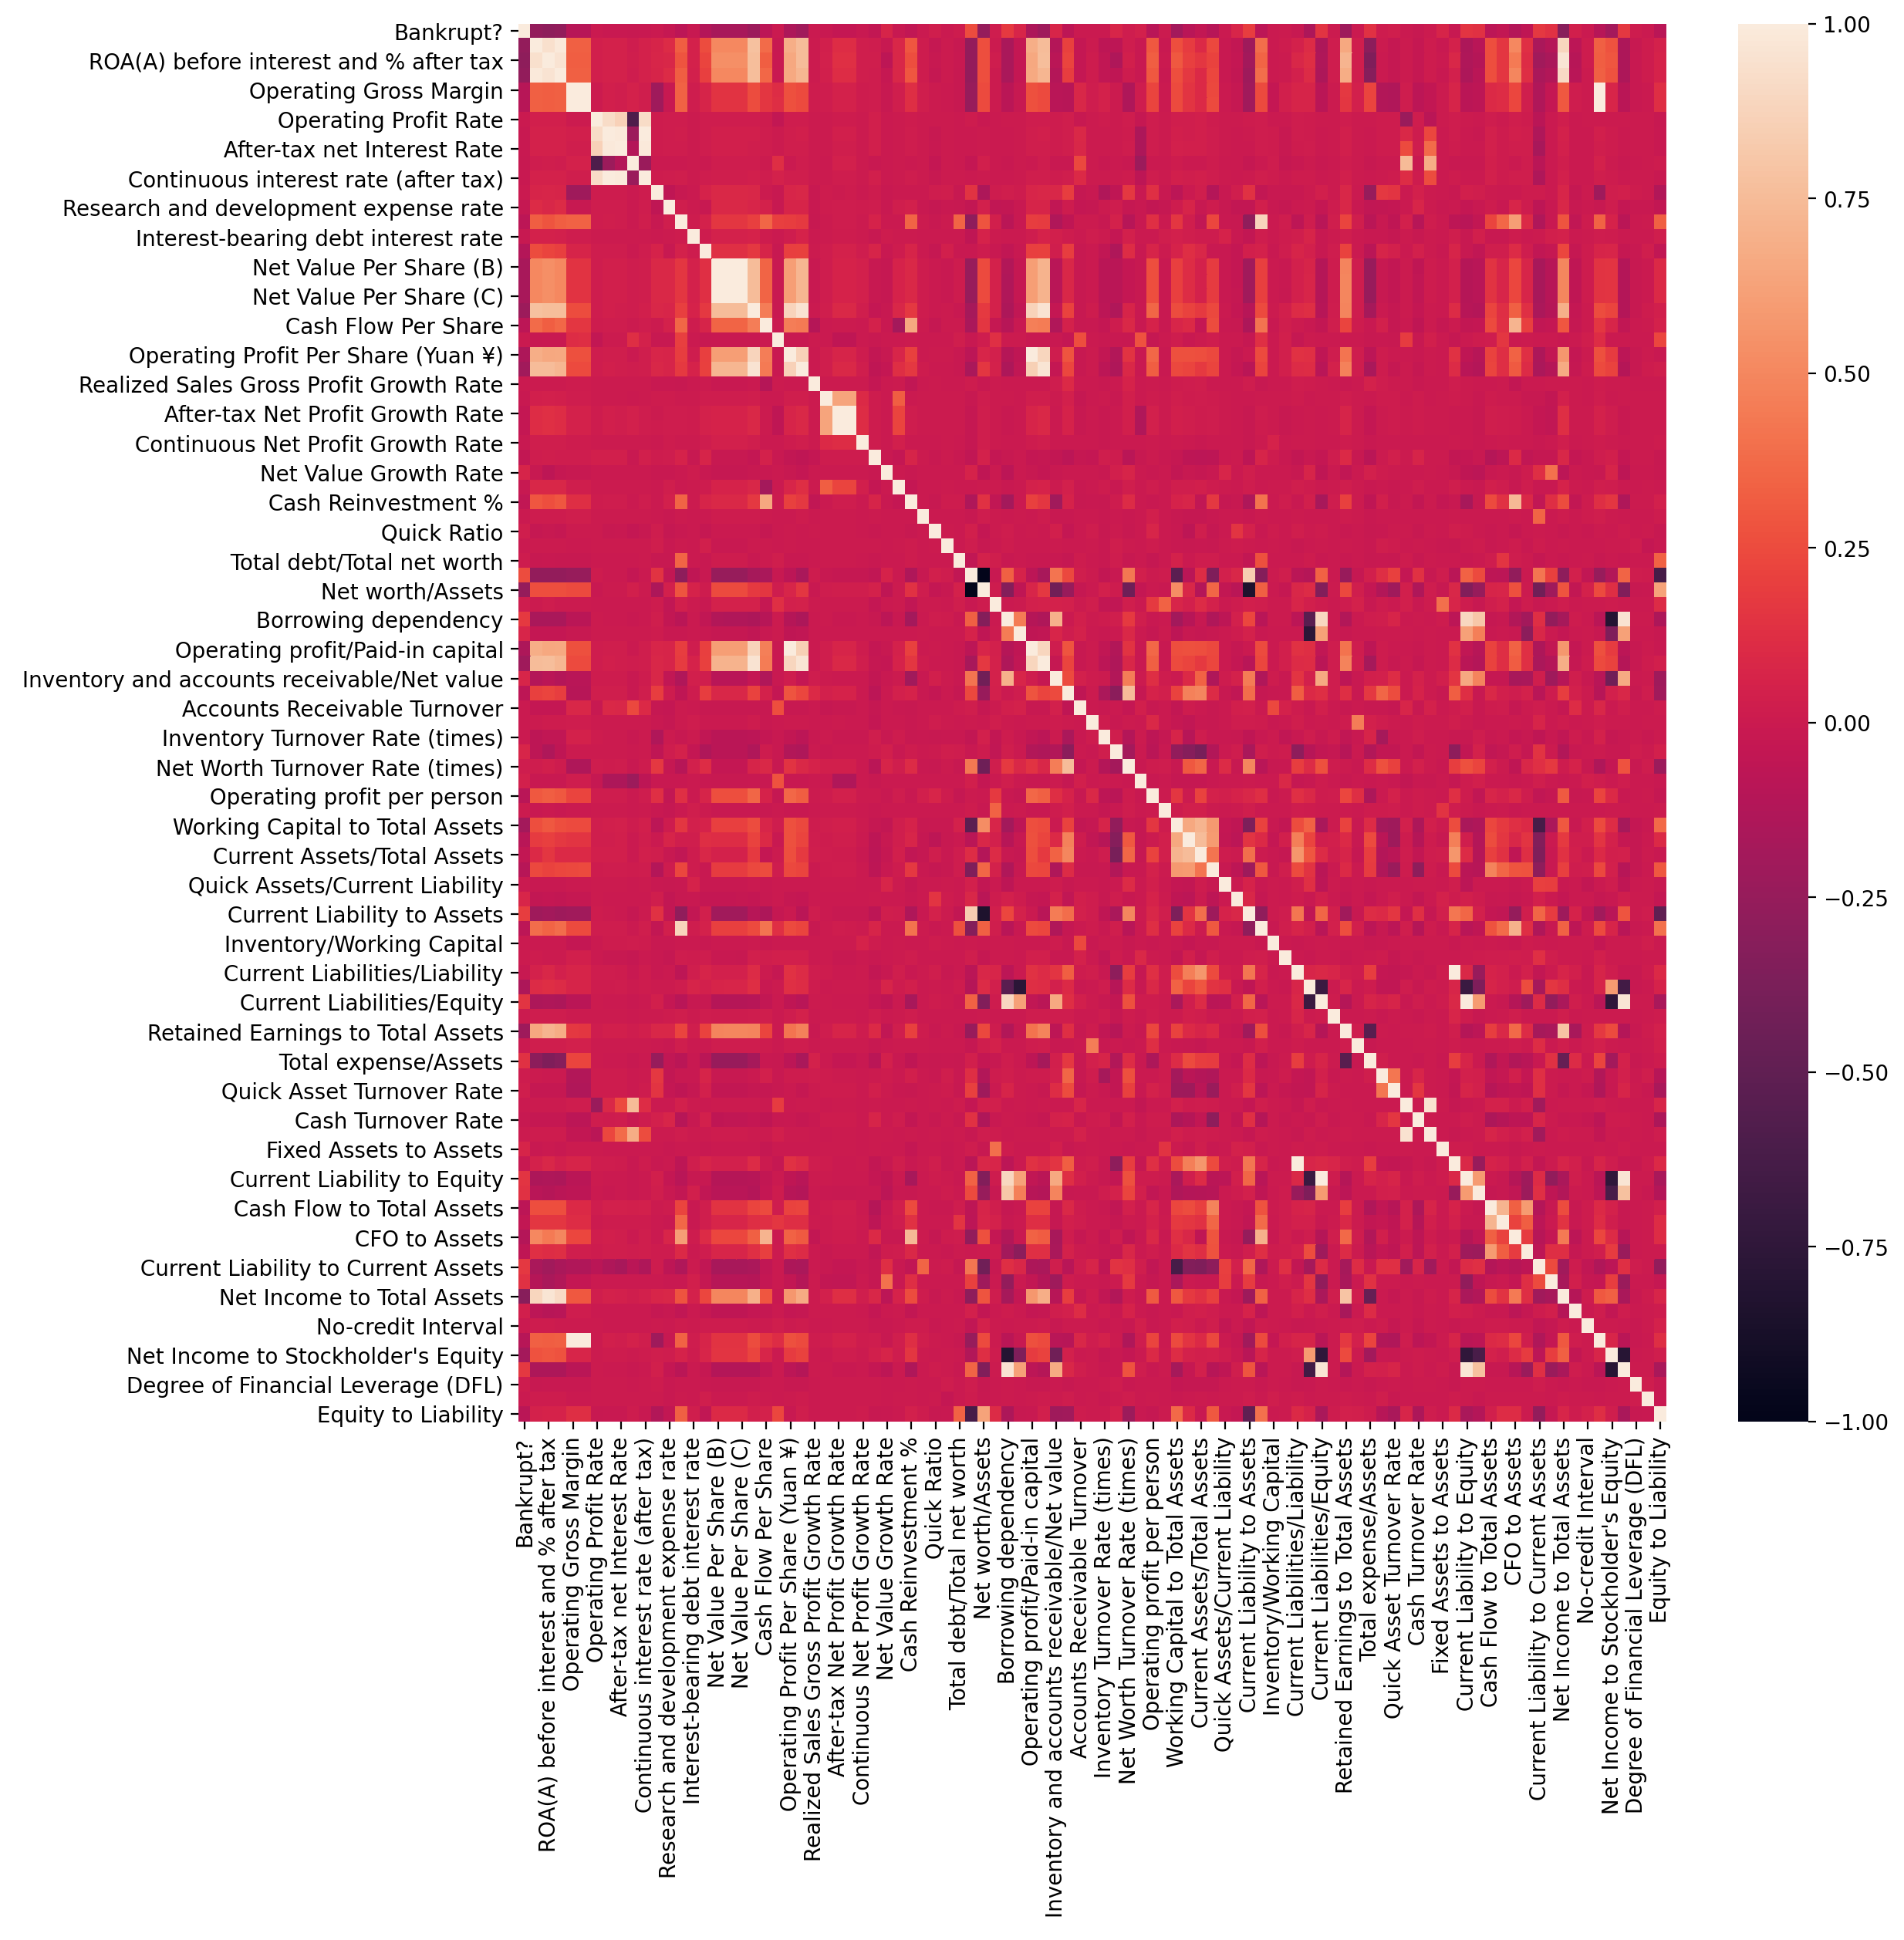

In [18]:
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap(bank_data.corr(),)

### We are not able to compare how the features are correlated to each other
 - We cant do feature elimination one by one manually as there are so many features and its not the best practice
 - Hence we need some other feature elimination technique to get better insights i.e We need to automate the process

## Pearson correlation

In [1285]:

# Import those libraries
import pandas as pd
from scipy.stats import pearsonr

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset


In [1286]:
bank_data_stage_1=bank_data.copy()
correlation(bank_data_stage_1,.85)

<AxesSubplot:>

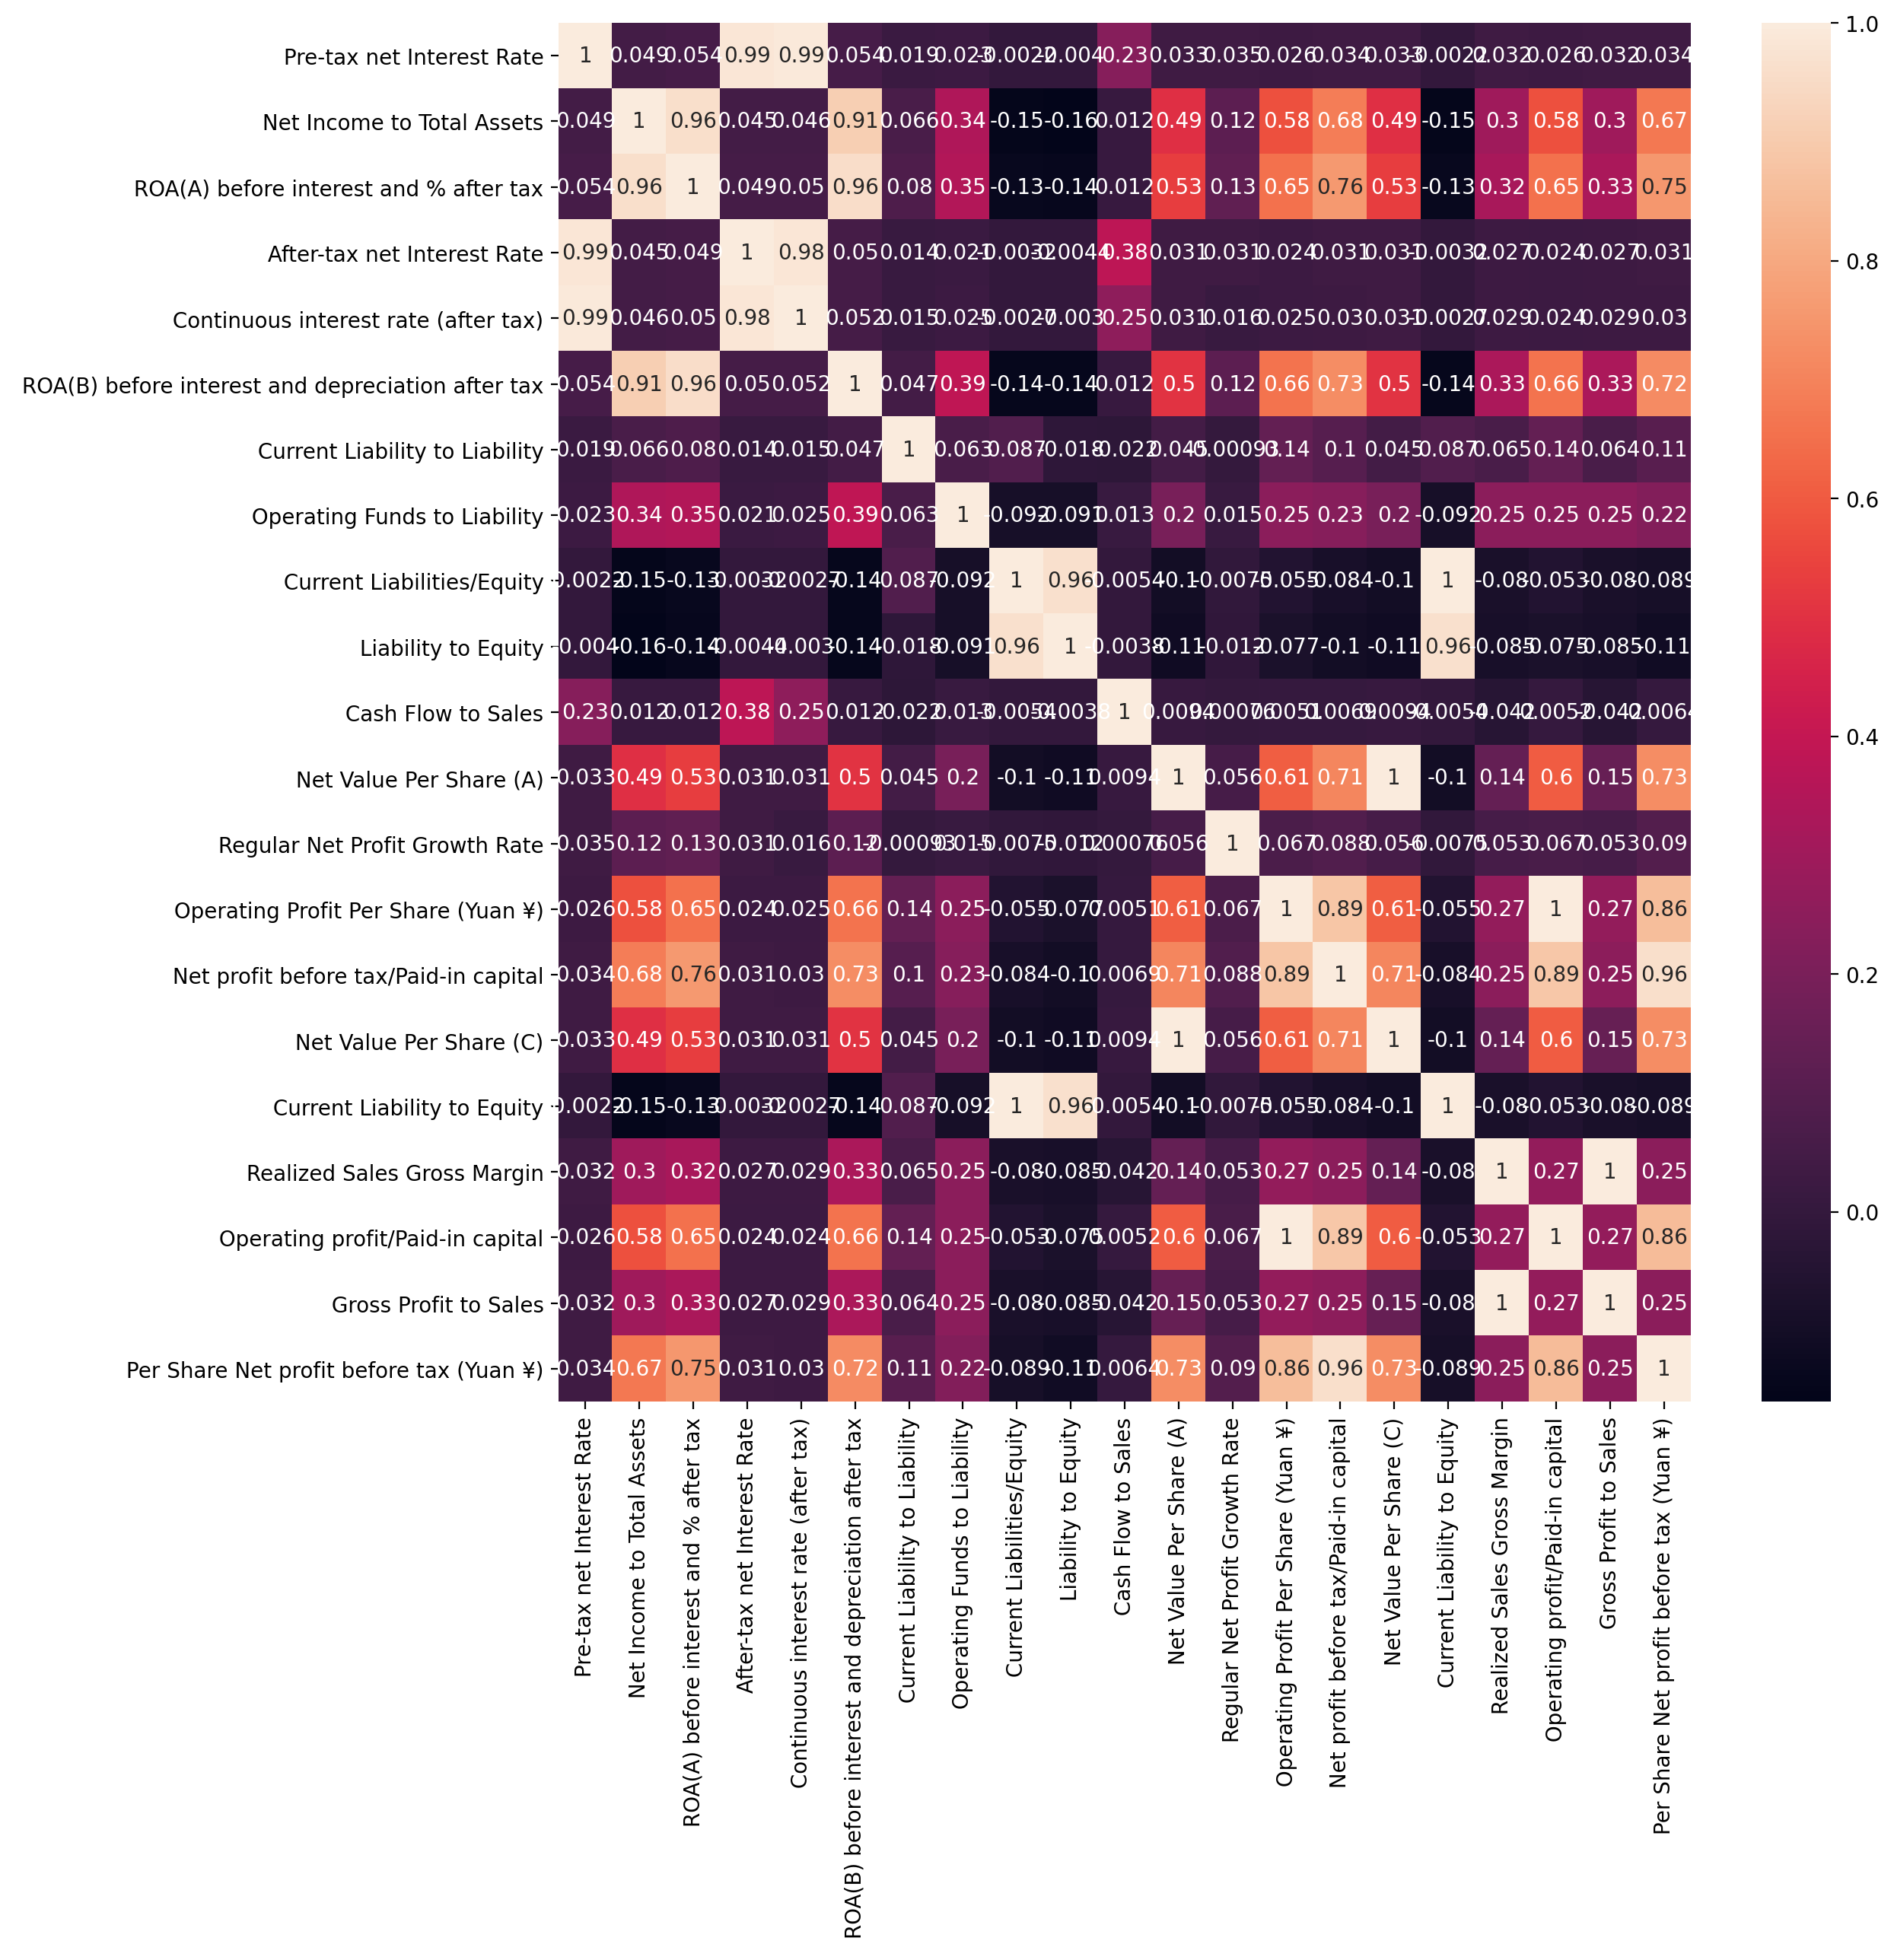

In [1287]:
high_corr_cols=set(bank_data.columns)-set(bank_data_stage_1.columns)
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap(bank_data[high_corr_cols].corr(),annot=True)

- Above map is the heatmap of high correlated features that are removed from data set 

In [1288]:
bank_data_stage_1

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       Operating Gross Margin   Operating Profit Rate  \
0                    0.601457                0.998969   
1                    0.610235                0.998946   
2                    0.601450                0.998857   
3                    0.583541                0.998700   
4                    0.598783                0.998973   
...                       ...                     ...   
6814                 0.604455                0.998992   
6815                 0.598308                0.998992   
6816                 0.610444                0.998984   
6817                 0.607850                0.999074   
6818                 0.627409                0.998080   

       Non-industry income and expenditure/revenue   Operating Expense Rate  \
0                                         0.302646             1.256969e-04   
1                                         0.303556             2.897851e-04   
2                                         0.302035             2.361297e-04   
3                                         0.303350             1.078888e-04   
4                                         0.303475             7.890000e+09   
...                                            ...                      ...   
6814                                      0.303510             1.510213e-04   
6815                                      0.303520             5.220000e+09   
6816                                      0.303512             2.509312e-04   
6817                                      0.303498             1.236154e-04   
6818                                      0.313415             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
0                               0.000000e+00         0.458143   
1                               0.000000e+00         0.461867   
2                               2.550000e+07         0.458521   
3                               0.000000e+00         0.465705   
4                               0.000000e+00         0.462746   
...                                      ...              ...   
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
0                             7.250725e-04       0.000000   
1                             6.470647e-04       0.000000   
2                             7.900790e-04       0.000000   
3                             4.490449e-04       0.000000   
4                             6.860686e-04       0.000000   
...                                    ...            ...   
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.18129

- Features is been reduced from 95 to 72 by removed high correlated features that are above .85

In [1289]:
display_quatile_dist(np.log(bank_data_stage_1+1),bank_data_stage_1.columns)

In [1200]:
display_quatile_dist(bank_data_stage_1,bank_data_stage_1.columns)

In [1201]:
features=[x for x in bank_data_stage_1.columns if x not in ["Bankrupt?"]]


In [1202]:
def graph_label_title(x_label=False,y_label=False,title=False):
    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(x_label)
    if title:
        plt.title(title)
        

## Checking skewness of all the features in the form of distribution


In [1346]:
skew_table=bank_data_stage_1.drop('Bankrupt?',axis=1).skew().sort_values()
print( "\033[1m" + 'Top 5 features that skewed negatively' + "\033[0m")
display(pd.DataFrame(skew_table.head()))
print( "\033[1m" + 'Top 5 features that skewed positively' + "\033[0m")
display(pd.DataFrame(skew_table.tail()))

Top 5 features that skewed negatively


0
 Continuous Net Profit Growth Rate           -51.503413
 Working Capital/Equity                      -48.326019
 Net Income to Stockholder's Equity          -39.345746
 Non-industry income and expenditure/revenue -34.665482
 Operating Profit Rate                       -25.775223

Top 5 features that skewed positively


0
 Degree of Financial Leverage (DFL)   36.286928
 Net Value Growth Rate                47.852245
 Average Collection Days              52.496862
 Accounts Receivable Turnover         56.561824
 Interest-bearing debt interest rate  57.207820

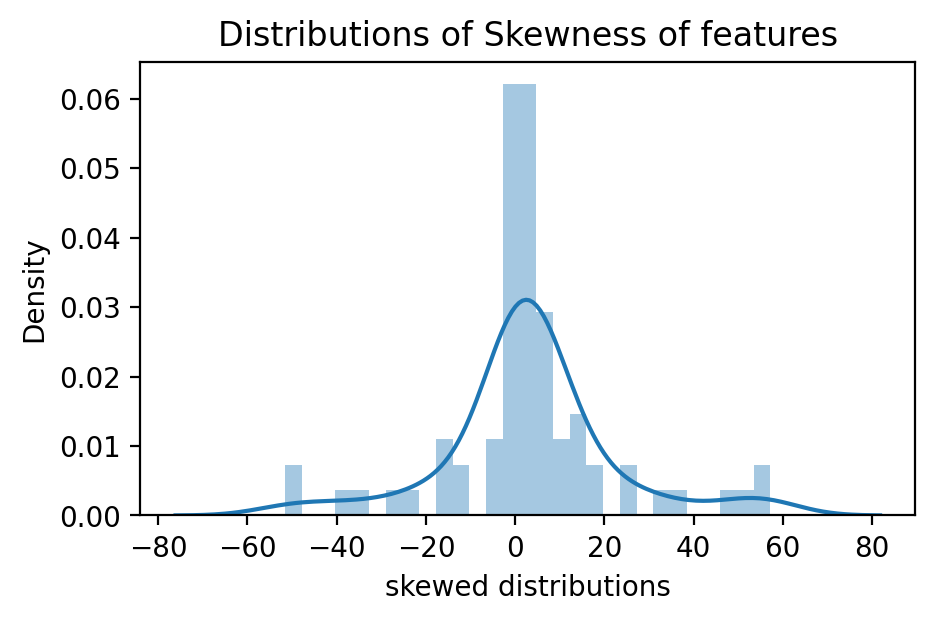

In [1347]:
plt.figure(figsize=(5,3),dpi=200)
sns.distplot(skew_table)
graph_label_title('skewed distributions',False,'Distributions of Skewness of features')

- We can see that most of the features are skewed towards 0
- There are features that are skewed towards both right side and left side

In [1292]:
bank_data["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [1293]:
pd.DataFrame().shape[0]

0

### Lets check some highly right skewed features


In [1359]:
def print_skewness_and_handle_outlier(skewness_range_1,skewness_range_2,data,skewness,percentile=.99,inplace=False):
    data_=data.copy()
    skew_cols=skeeness_Range(skewness_range_1,skewness_range_2)
    print("*"*4+f'Displaying first 5 rows of features that are having it skewness from {skewness_range_1} to {skewness_range_2}'+"*"*4)
    display(data[skew_cols].head())
    
    print("*"*4+' Box plot before removal of outliers'+"*"*4)
    plt.figure(figsize=(15,3))
    ax = sns.boxplot(data=data_[skew_cols], orient="h", palette="Set2")
    plt.show()
    
    print('\n'+"*"*4+f' Displaying percentile of columns that are skewed from {skewness_range_1} to {skewness_range_2} '+"*"*4)
    print('\n'+'*'*55+"BEFORE"+'*'*55)
    display_quatile_dist(data_,skew_cols)
    plt.show()
    print("\nSKEWNESS")
    print('\n'+'*'*55+"BEFORE"+'*'*55)
    data_[skew_cols].hist(bins=50,figsize=(12,8))
    plt.show()

    
    outlier_indices=return_and_print_outliers_(data,skew_cols,percentile,skewness,inplace)
#     data1=data_.drop(outlier_indices[0])
    data.drop(outlier_indices[0],inplace=inplace)


    

    
#     print("*"*4+' Box plot after removal of outliers'+"*"*4)
#     plt.figure(figsize=(15,3))
#     ax = sns.boxplot(data=data1[skew_cols], orient="h", palette="Set2")
#     plt.show()
    return skew_cols


def return_and_print_outliers_(data,cols,percentile,skewness,inplace):
    print(f'\n\n {"*"*10}Outliers beyond {percentile} percentile {"*"*10}')
    outliers_indcies=set()
    outliers_indcies_minority=set()
    
    a=pd.DataFrame()
    b=pd.DataFrame()
    for i in cols:
        if skewness=="+":
            outlier_=data[(data[i]> percentile)]
            outlier=outlier_[(outlier_["Bankrupt?"]!=1)]
            outlier_minority=outlier_[(outlier_["Bankrupt?"]!=0)]
#             if inplace:
            if data.loc[(data[i]> percentile) &  (data["Bankrupt?"]!=0),[i]].shape[0] > 0 and inplace:
                data.loc[(data[i]> percentile) &  (data["Bankrupt?"]!=0),[i]]=data.loc[data["Bankrupt?"]!=0,[i]].median().values[0]
#                 print(data.loc[data["Bankrupt?"]!=0,[i]].median().values[0],data.loc[(data[i]> percentile) &  (data["Bankrupt?"]!=0),[i]])
        elif skewness=='-': 
            outlier_=data[(data[i] < percentile)]
            outlier=outlier_[(outlier_["Bankrupt?"]!=1)]
            outlier_minority=outlier_[(outlier_["Bankrupt?"]!=0)]
#             if inplace:
            if data.loc[(data[i]  < percentile) &  (data["Bankrupt?"]!=0),[i]].shape[0] > 0 and inplace:
                data.loc[(data[i] < percentile) &  (data["Bankrupt?"]!=0),[i]]=data.loc[data["Bankrupt?"]!=0,[i]].median().values[0]
#                 print(data.loc[data["Bankrupt?"]!=0,[i]].median().values[0],data.loc[(data[i]> percentile) &  (data["Bankrupt?"]!=0),[i]])
        outliers_indcies.update(outlier.index)
        outliers_indcies_minority.update(outlier_minority.index)
        a=pd.concat([a,outlier])
        b=pd.concat([b,outlier_minority])
#     cols.append("Bankrupt?")
   
    if a[cols].shape[1]!=0:
#         modified_data=data.loc[list(outliers_indcies)+list(outliers_indcies_minority),cols+["Bankrupt?"]]
        modified_data=pd.concat([a,b]).loc[list(outliers_indcies)+list(outliers_indcies_minority),cols+["Bankrupt?"]]
        

#         display(a[cols+["Bankrupt?"]].reset_index(drop=True).style.bar())
        try:
            display(modified_data.style.bar())
        except:
            display(modified_data)
        print(len(outliers_indcies_minority),'minority class')
            

#         display(a[cols])
    print(f'{b.shape[0]} rows of specific column  are imputed to median value ')
    print(f'{a.shape[0]} rows are removed ')
    print("\nSKEWNESS")
    print('\n'+'*'*55+"AFTER"+'*'*55)
    data.drop(list(outliers_indcies)+list(outliers_indcies_minority))[cols].hist(bins=50,figsize=(12,8))
    plt.show()     
    print("*"*4+' Box plot after removal of outliers'+"*"*4)
    plt.figure(figsize=(15,3))
    sns.boxplot(data=data[cols].drop(list(outliers_indcies)+list(outliers_indcies_minority)), orient="h", palette="Set2")
    plt.show()
    print("\nPERCENTILE")
    print('*'*55+"AFTER"+'*'*55)
    display_quatile_dist(data[cols].drop(list(outliers_indcies)+list(outliers_indcies_minority)),cols)
    plt.show()
    
    return [outliers_indcies,outliers_indcies_minority]

def skeeness_Range(range1,range2):
    cols_in_range=[]
    for ind in skew_table.index:
        if range2 > skew_table[ind] >= range1 :
            cols_in_range.append(ind)
    return cols_in_range





# Analysing Feature from skewness 70 to 85

****Displaying first 5 rows of features that are having it skewness from 70 to 85****


Realized Sales Gross Profit Growth Rate  \
0                                  0.022102   
1                                  0.022080   
2                                  0.022760   
3                                  0.022046   
4                                  0.022096   

    Contingent liabilities/Net worth   Net Value Growth Rate  \
0                           0.006479                0.000327   
1                           0.005835                0.000443   
2                           0.006562                0.000396   
3                           0.005366                0.000382   
4                           0.006624                0.000439   

    Total income/Total expense   Current Ratio   Fixed Assets to Assets  
0                     0.002022        0.002259                 0.424206  
1                     0.002226        0.006016                 0.468828  
2                     0.002060        0.011543                 0.276179  
3                     0.001831        0.004194                 0.559144  
4                     0.002224        0.006022                 0.309555

**** Box plot before removal of outliers****


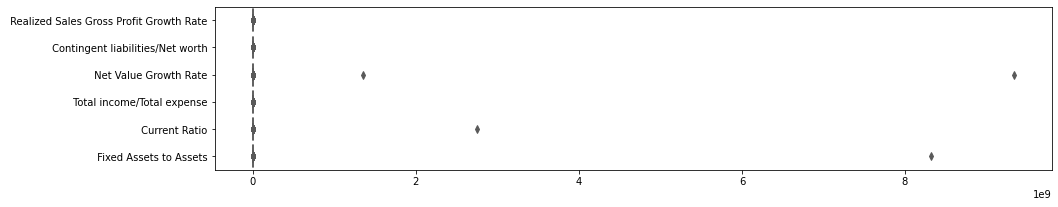


**** Displaying percentile of columns that are skewed from 70 to 85 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


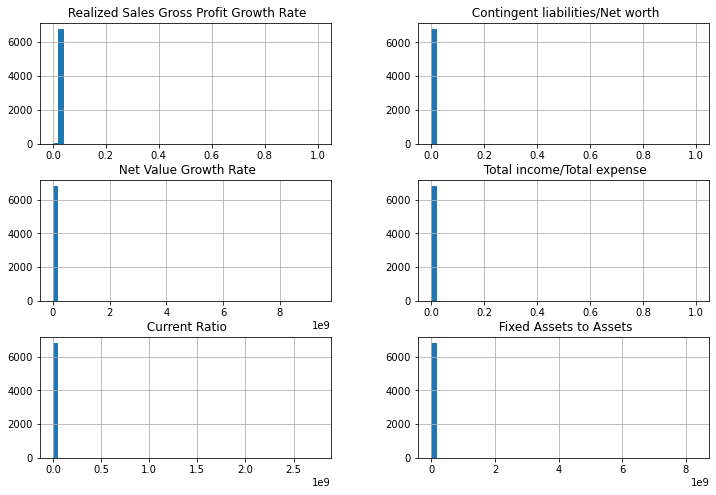



 **********Outliers beyond 0.9 percentile **********


4 minority class
15 columns are manipulated 

SKEWNESS

*******************************************************AFTER*******************************************************


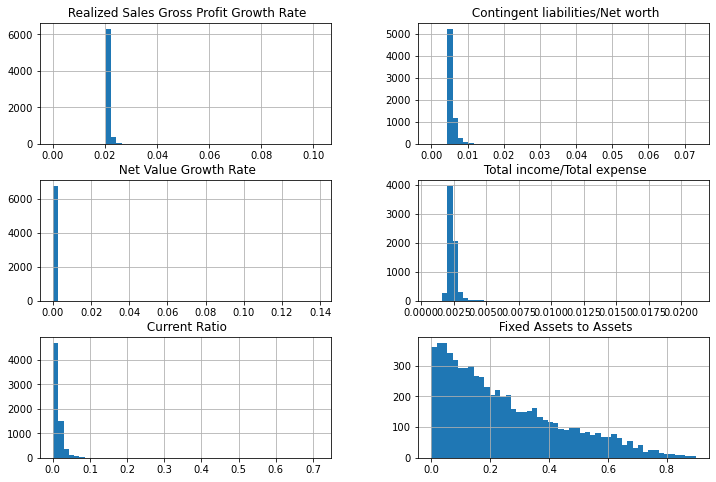

**** Box plot after removal of outliers****


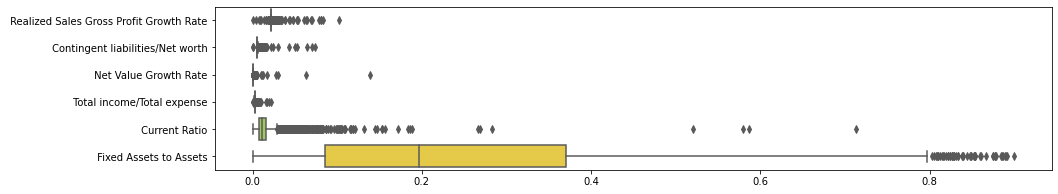


PERCENTILE
*******************************************************AFTER*******************************************************


[' Realized Sales Gross Profit Growth Rate',
 ' Contingent liabilities/Net worth',
 ' Net Value Growth Rate',
 ' Total income/Total expense',
 ' Current Ratio',
 ' Fixed Assets to Assets']

In [1332]:
print_skewness_and_handle_outlier(70,85,bank_data_stage_1,'+',.90,True)

# Analysing Features having skewness from 60 to 70

****Displaying first 5 rows of features that are having it skewness from 60 to 70****


Total Asset Return Growth Rate Ratio   Continuous Net Profit Growth Rate
0                               0.263100                            0.217535
1                               0.264516                            0.217620
2                               0.264184                            0.217601
3                               0.263371                            0.217568
4                               0.265218                            0.217626

**** Box plot before removal of outliers****


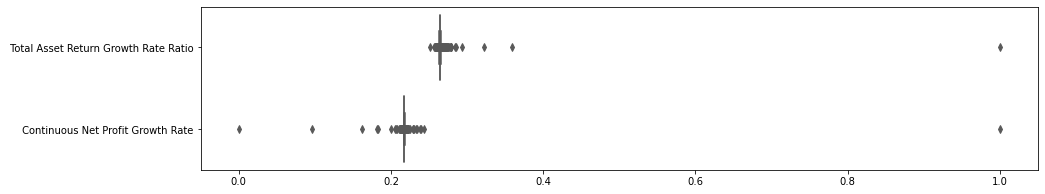


**** Displaying percentile of columns that are skewed from 60 to 70 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


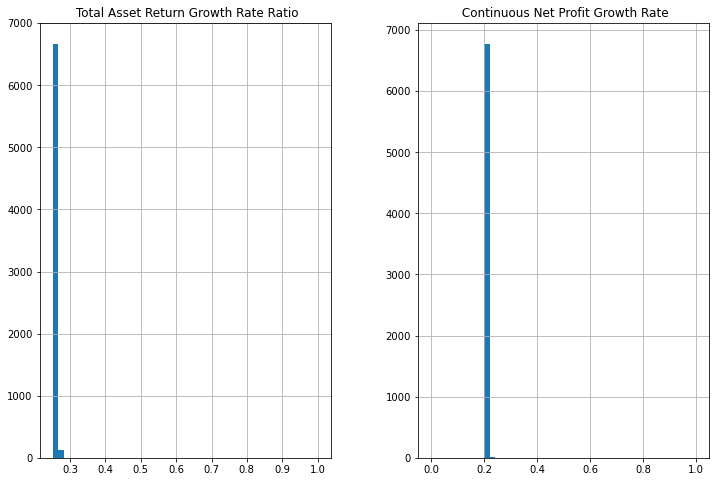



 **********Outliers beyond 0.8 percentile **********


0 minority class
2 columns are manipulated 

SKEWNESS

*******************************************************AFTER*******************************************************


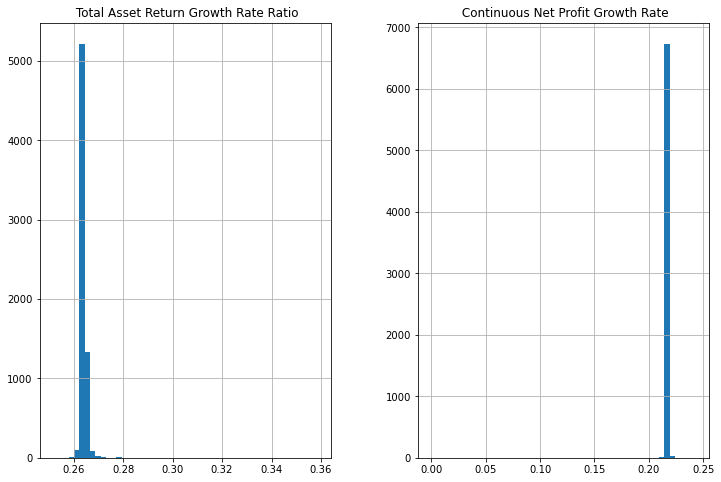

**** Box plot after removal of outliers****


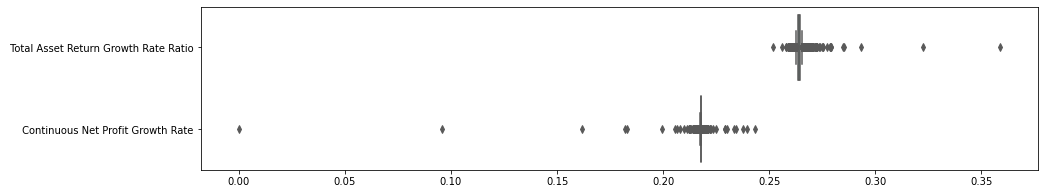


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Continuous Net Profit Growth Rate    0.000011
 Working capitcal Turnover Rate       0.000029
dtype: float64

In [1333]:
print_skewness_and_handle_outlier(60,70,bank_data_stage_1,'+',.8,True)

print("Displaying Variance ")
bank_data_stage_1[[' Continuous Net Profit Growth Rate',' Working capitcal Turnover Rate']].var()

- By the above analysis we see that the values of Feature 
    - **Continuous Net Profit Growth Rate** 
    - **Working capitcal Turnover Rate**<br>
    These above columns have low variance hence they are eligible to be **Removed**

# Analysing Features having skewness from 60 to 70 45 to 61

****Displaying first 5 rows of features that are having it skewness from 45 to 61****


Inventory/Working Capital   Degree of Financial Leverage (DFL)  \
0                    0.276920                             0.026601   
1                    0.289642                             0.264577   
2                    0.277456                             0.026555   
3                    0.276580                             0.026697   
4                    0.287913                             0.024752   

    Total debt/Total net worth   Quick Assets/Current Liability  \
0                     0.021266                         0.001997   
1                     0.012502                         0.004136   
2                     0.021248                         0.006302   
3                     0.009572                         0.002961   
4                     0.005150                         0.004275   

    Revenue per person  
0             0.034164  
1             0.006889  
2             0.028997  
3             0.015463  
4             0.058111

**** Box plot before removal of outliers****


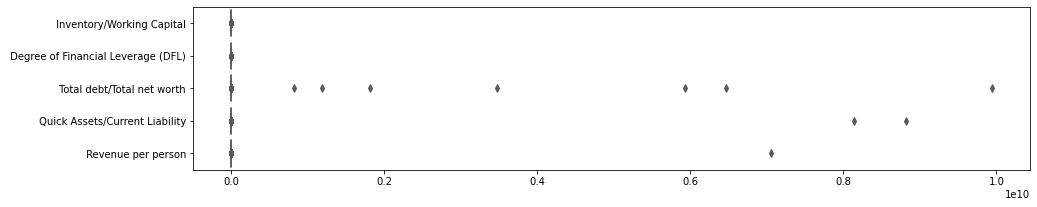


**** Displaying percentile of columns that are skewed from 45 to 61 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


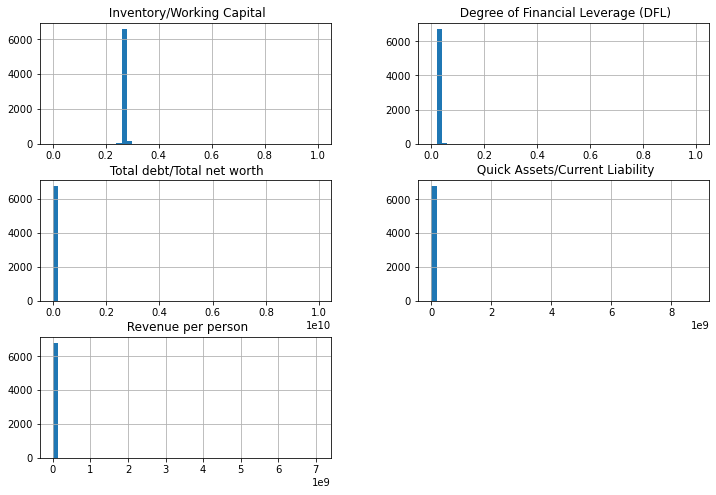



 **********Outliers beyond 0.7 percentile **********


3 minority class
13 columns are manipulated 

SKEWNESS

*******************************************************AFTER*******************************************************


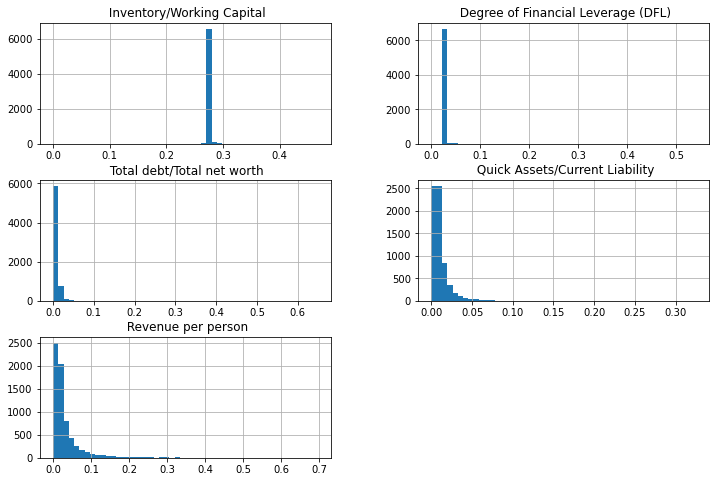

**** Box plot after removal of outliers****


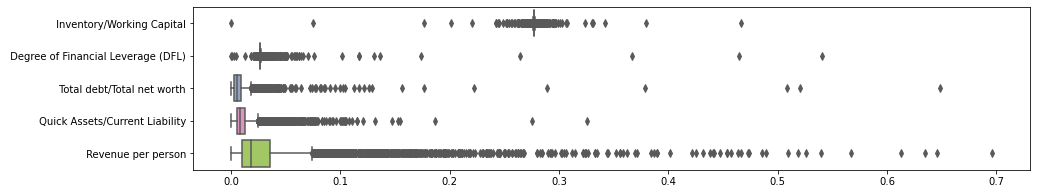


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Inventory/Working Capital             0.000033
 Degree of Financial Leverage (DFL)    0.000107
 Total debt/Total net worth            0.000244
 Quick Assets/Current Liability        0.000172
 Revenue per person                    0.002766
dtype: float64

In [1334]:
list_col=print_skewness_and_handle_outlier(45,61,bank_data_stage_1,'+',.7,True)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

#### Here analysed features that have skewness between 45 to 61 
   - Removed Data point above .7 percentile
   - As a result 17 columns were removed

#### Displaying Variance 
 1. **Revenue Per Share (Yuan ¥)----------- 0.001777**
 2. **Net Value Growth Rate --------------- 0.000004**
 3. **Total debt/Total net worth-----------0.000240**
 4. **Quick Assets/Current Liability--------0.000156**
 5. **Inventory/Working Capital-------------- 0.000033**
 6. **Degree of Financial Leverage (DFL)--- 0.000107**
 
  ***columns list on top have very low variance***

# Analysing Features having skewness from 30 to 44

****Displaying first 5 rows of features that are having it skewness from 30 to 44****


Average Collection Days   Quick Ratio   Equity to Long-term Liability  \
0                  0.003487      0.001208                        0.126549   
1                  0.004917      0.004039                        0.120916   
2                  0.004227      0.005348                        0.117922   
3                  0.003215      0.002896                        0.120760   
4                  0.004367      0.003727                        0.110933   

    Non-industry income and expenditure/revenue   Revenue Per Share (Yuan ¥)  
0                                      0.302646                     0.017560  
1                                      0.303556                     0.021144  
2                                      0.302035                     0.005944  
3                                      0.303350                     0.014368  
4                                      0.303475                     0.029690

**** Box plot before removal of outliers****


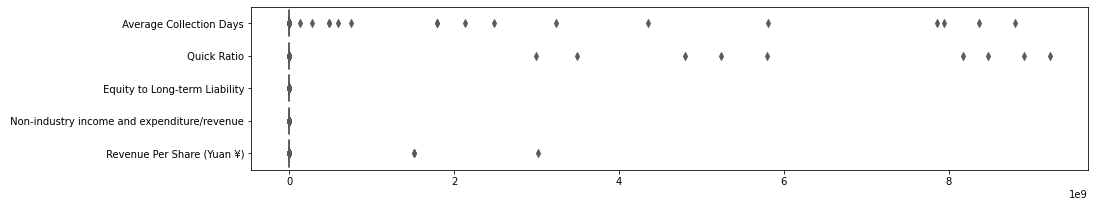


**** Displaying percentile of columns that are skewed from 30 to 44 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


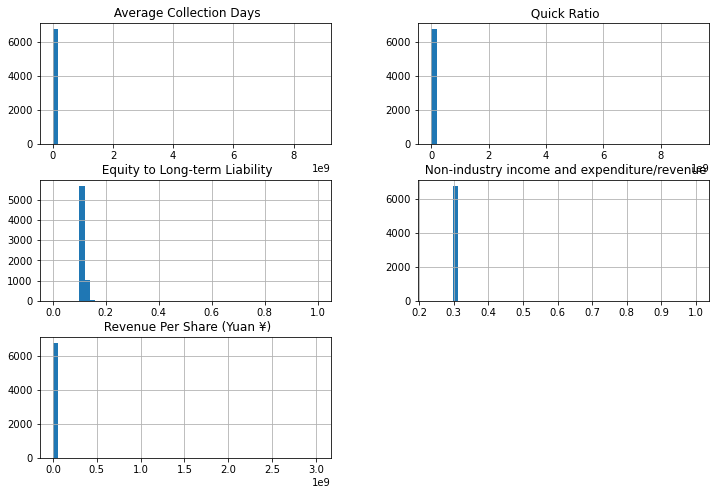



 **********Outliers beyond 0.8 percentile **********


Average Collection Days   Quick Ratio   Equity to Long-term Liability  \
2432              1.790000e+09  2.825997e-04                        0.115993   
2306              5.815120e-04  5.800000e+09                        0.110933   
3845              2.130000e+09  6.556563e-04                        0.110933   
2570              8.800000e+09  1.519675e-03                        0.110933   
3978              2.730000e+08  4.235253e-02                        0.110933   
4116              1.019567e-03  3.398059e-03                        0.110933   
5015              1.640445e-02  5.301396e-03                        0.114850   
3096              7.510000e+08  1.931348e-02                        0.119212   
1691              2.246635e-03  5.003824e-03                        0.110933   
2846              4.780000e+08  4.242739e-03                        0.110933   
2336              2.023764e-04  8.920000e+09                        0.118868   
2217              7.940000e+09  2.476647e-04                        0.110933   
2226              2.126233e-04  8.480000e+09                        0.115753   
2355              2.109155e-04  4.800000e+09                        0.110933   
2491              1.790000e+09  1.489731e-03                        0.111470   
2363              6.511995e-02  6.200974e-03                        0.111182   
2119              1.288549e-03  3.490000e+09                        0.110933   
2384              3.240000e+09  6.587755e-04                        0.112014   
2257              3.620574e-03  8.170000e+09                        0.110933   
2518              5.980000e+08  2.935169e-03                        0.114540   
2263              4.350000e+09  2.439216e-04                        0.110933   
2393              5.772425e-04  3.220445e-01                        0.110933   
2778              5.810000e+09  2.071774e-03                        0.112525   
2918              8.370000e+09  4.860341e-03                        0.110933   
2406              5.405244e-04  5.240000e+09                        0.110933   
2409              2.480000e+09  2.990000e+09                        0.112071   
2409              2.480000e+09  2.990000e+09                        0.112071   
2411              1.317718e-01  1.199021e-03                        0.112778   
2543              7.860000e+09  6.972041e-03                        0.111496   
4338              5.973947e-03  4.720601e-03                        1.000000   
2420              4.780000e+08  7.779290e-04                        0.120176   
2344              1.370000e+08  0.000000e+00                        0.110933   
2147              1.479824e-02  9.230000e+09                        0.116022   
2440              6.771498e-04  9.956493e-04                        0.862994   
427               1.064910e-02  1.713690e-03                        0.922128   

       Non-industry income and expenditure/revenue  \
2432                                      0.303503   
2306                                      0.303387   
3845                                      0.303293   
2570                                      0.303550   
3978                                      0.303593   
4116                                      0.303526   
5015                                      1.000000   
3096                                      0.303552   
1691                                      0.303526   
2846                                      0.303565   
2336                                      0.303523   
2217                                      0.303544   
2226                                      0.303519   
2355                                      0.303649   
2491                                      0.320065   
2363                                      0.730252   
2119                                      0.303413   
2384                                      0.303541   
2257                                      0.300096   
2518                                      0.33

4 minority class
31 columns are manipulated 

SKEWNESS

*******************************************************AFTER*******************************************************


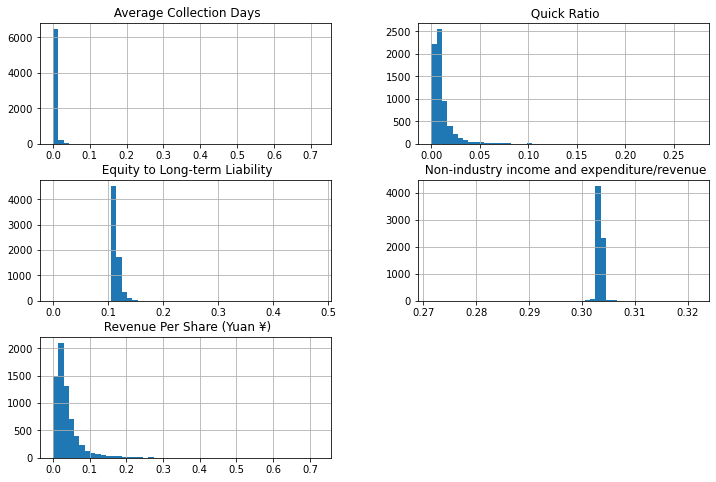

**** Box plot after removal of outliers****


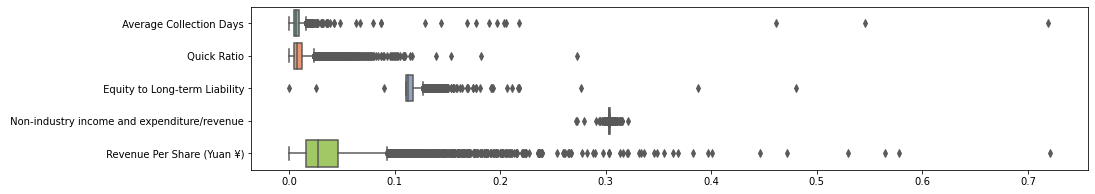


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Average Collection Days                        0.000208
 Quick Ratio                                    0.000146
 Equity to Long-term Liability                  0.000089
 Non-industry income and expenditure/revenue    0.000002
 Revenue Per Share (Yuan ¥)                     0.001747
dtype: float64

In [1337]:
list_col=print_skewness_and_handle_outlier(30,44,bank_data_stage_1,'+',.8,True)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

- We can see that there are some outliers present

# Analysing Features having skewness from 20 to 30

****Displaying first 5 rows of features that are having it skewness from 20 to 30****


Borrowing dependency   Total assets to GNP price  \
0               0.390284                    0.009219   
1               0.376760                    0.008323   
2               0.379093                    0.040003   
3               0.379743                    0.003252   
4               0.375025                    0.003878   

    Long-term fund suitability ratio (A)   Accounts Receivable Turnover  \
0                               0.005024                       0.001814   
1                               0.005059                       0.001286   
2                               0.005100                       0.001495   
3                               0.005047                       0.001966   
4                               0.005303                       0.001449   

    Allocation rate per person   Liability-Assets Flag  
0                     0.037135                       0  
1                     0.012335                       0  
2                     0.141016                       0  
3                     0.021320                       0  
4                     0.023988                       0

**** Box plot before removal of outliers****


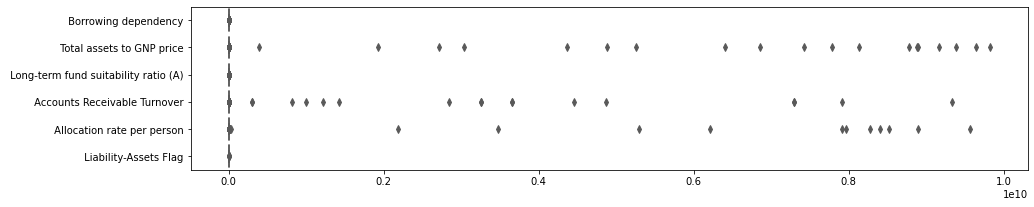


**** Displaying percentile of columns that are skewed from 20 to 30 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


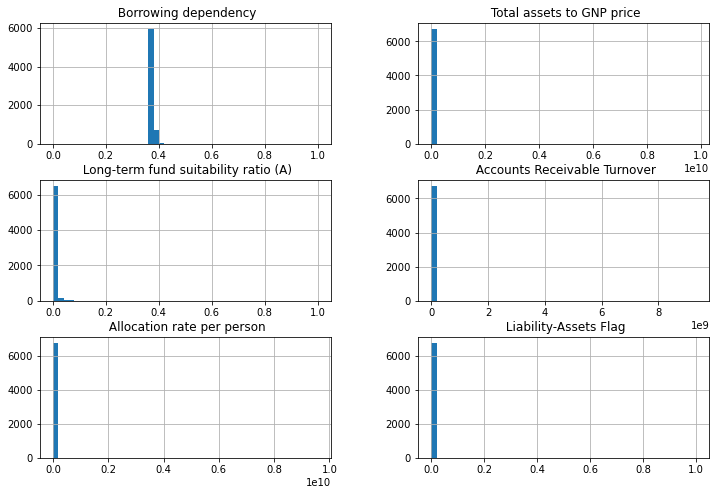



 **********Outliers beyond 0.9 percentile **********


Borrowing dependency   Total assets to GNP price  \
6531               0.373670                7.817195e-04   
2692               0.416696                2.001635e-02   
3079               0.369637                8.780000e+09   
2825               0.400874                1.842469e-02   
2574               0.369637                7.420000e+09   
1679               0.382681                9.820000e+09   
2069               0.369637                7.790000e+09   
2966               0.406525                2.028857e-02   
918                0.371015                4.861688e-04   
6428               0.382589                5.260000e+09   
2593               0.402899                8.384013e-03   
2722               0.402818                7.000431e-03   
1574               0.369758                8.880000e+09   
1574               0.369758                8.880000e+09   
5031               0.369637                9.390000e+09   
2858               0.403770                3.719825e-03   
5808               0.383563                6.410000e+09   
6577               0.371300                6.657964e-04   
1076               0.369770                3.306521e-04   
2996               0.369637                4.788003e-02   
3386               0.380369                9.650000e+09   
3392               0.369637                1.920000e+09   
2628               0.437324                2.352199e-02   
2758               0.403900                1.935290e-02   
5194               0.373378                4.880000e+09   
3790               0.369637                8.890000e+09   
2894               0.404433                1.970772e-02   
3540               0.395236                4.370000e+09   
6613               0.357440                3.030000e+09   
6613               0.357440                3.030000e+09   
6109               0.369715                3.876458e-03   
2910               0.373412                1.764915e-03   
2657               0.392974                6.550256e-03   
6625               0.372707                7.452346e-04   
3171               0.371337                3.940000e+08   
2915               0.372278                1.012876e-02   
2789               0.401300                5.255960e-03   
996                0.374354                4.846725e-04   
4325               0.369897                1.326274e-03   
1770               0.374084                2.994811e-03   
5612               0.385721                6.860000e+09   
2412               0.385257                1.898000e-02   
6254               0.369637                2.582039e-03   
2930               0.465365                2.301510e-03   
4215               0.370128                1.094066e-03   
6267               0.372771                1.355029e-02   
6267               0.372771                1.355029e-02   
1443               0.369637                2.710000e+09   
1861               0.431840                8.140000e+09   
2470               0.295894                8.658754e-03   
2440               0.954819                3.198215e-03   
2344               0.395616                2.043940e-03   
2344               0.395616                2.043940e-03   
427                1.000000                4.555700e-04   
5228               0.369637                9.170000e+09   
1869               0.000000                2.417803e-03   
1870               0.270743                3.231135e-03   
6640               0.357056                1.758765e-02   
2001               0.279725                1.109791e-02   
56                 0.262035                5.803037e-03   
379                0.409987                3.735586e-03   

       Long-term fund suitability ratio (A)   Accounts Receivable Turnover  \
6531                               0.029761                   7.973786e-04   
2692                               0.005634                   3.040000e+08   
3079                               0.009171                   6.573808e-04   
2825                               0

13 minority class
47 columns are manipulated 

SKEWNESS

*******************************************************AFTER*******************************************************


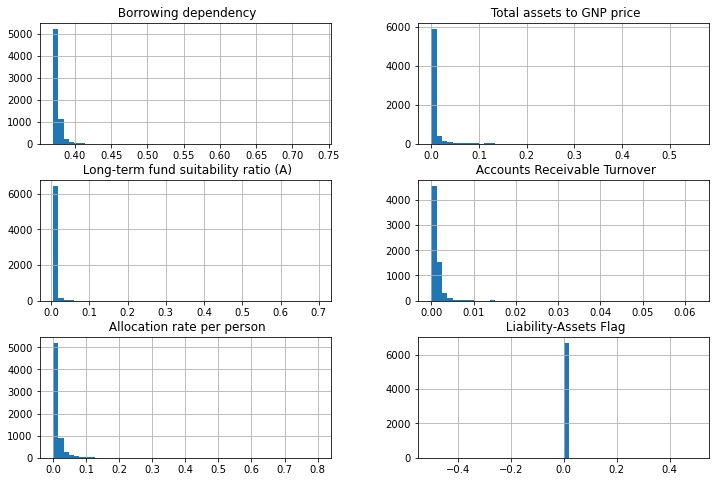

**** Box plot after removal of outliers****


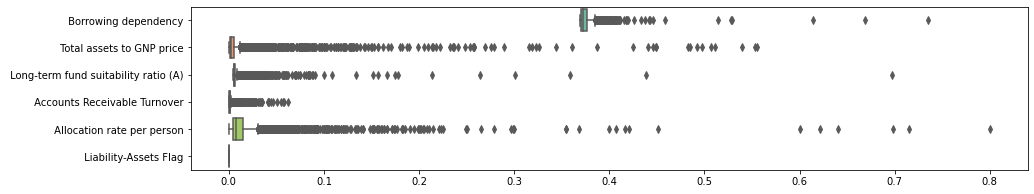


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Borrowing dependency                    0.000113
 Total assets to GNP price               0.001021
 Long-term fund suitability ratio (A)    0.000210
 Accounts Receivable Turnover            0.000039
 Allocation rate per person              0.001066
 Liability-Assets Flag                   0.000000
dtype: float64

In [1338]:
list_col=print_skewness_and_handle_outlier(20,30,bank_data_stage_1,'+',.9,True)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

In [1270]:
fe=bank_data_stage_1.loc[bank_data_stage_1["Bankrupt?"]==1,[' Cash/Current Liability']].sort_values(by=' Cash/Current Liability',ascending=False)
# sns.boxplot(np.log(bank_data_stage_1.loc[bank_data_stage_1["Bankrupt?"]==1,[' Cash/Current Liability']]))
fe[fe[' Cash/Current Liability']>fe[' Cash/Current Liability'].quantile(.93)].reset_index()

# bank_data_stage_1.loc[bank_data_stage_1["Bankrupt?"]==1,[' Cash/Current Liability']].sort_values(by=' Cash/Current Liability',ascending=False).tail(15)

index   Cash/Current Liability
0    2771             9.010000e+09
1    1311             7.660000e+09
2    2045             6.840000e+09
3     527             6.730000e+09
4    6545             5.390000e+09
5       2             5.340000e+09
6    2041             3.540000e+09
7    2148             3.370000e+09
8    1132             3.110000e+09
9    2344             2.090000e+09
10   2004             1.140000e+09
11   2096             6.960000e+08
12   1756             4.790000e+08
13   1640             4.440000e+08
14   1179             2.480000e+08
15   2198             9.768759e-02

# Analysing Features having skewness from 13 to 20

****Displaying first 5 rows of features that are having it skewness from 13 to 20****


Inventory and accounts receivable/Net value  \
0                                      0.398036   
1                                      0.397725   
2                                      0.406580   
3                                      0.397925   
4                                      0.400079   

    Current Liability to Current Assets   Cash/Current Liability  \
0                              0.118250             1.473360e-04   
1                              0.047775             1.383910e-03   
2                              0.025346             5.340000e+09   
3                              0.067250             1.010646e-03   
4                              0.047725             6.804636e-04   

    Cash Flow to Equity  
0              0.312905  
1              0.314163  
2              0.314515  
3              0.302382  
4              0.311567

**** Box plot before removal of outliers****


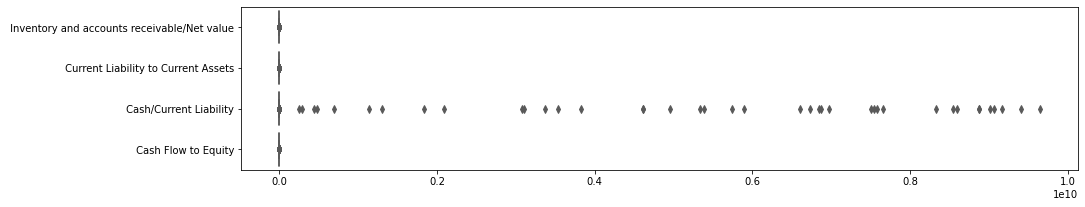


**** Displaying percentile of columns that are skewed from 13 to 20 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


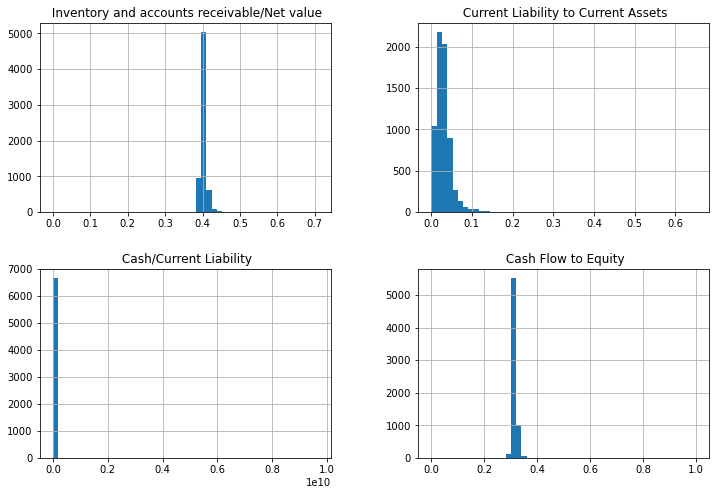



 **********Outliers beyond 0.95 percentile **********


15 minority class
26 columns are manipulated 

SKEWNESS

*******************************************************AFTER*******************************************************


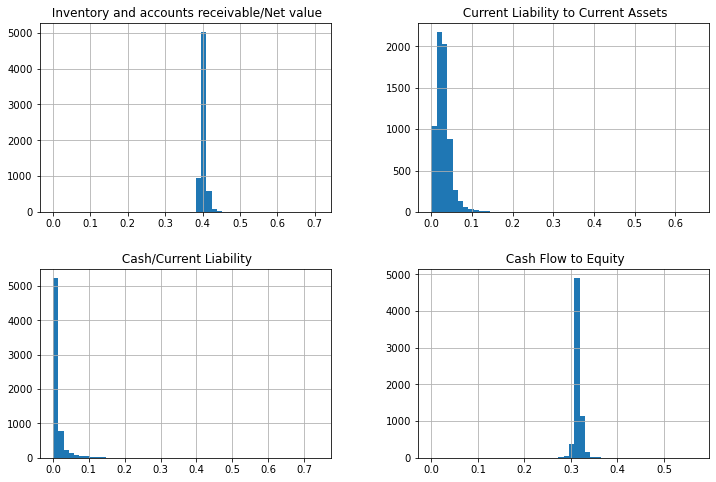

**** Box plot after removal of outliers****


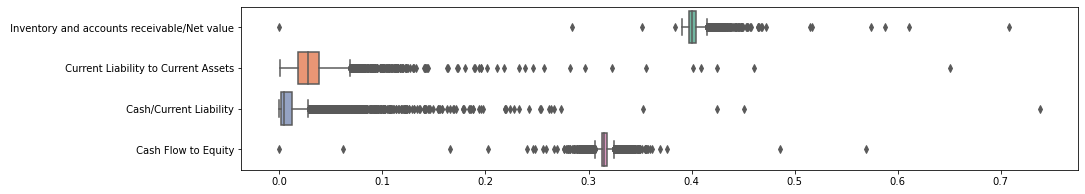


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Inventory and accounts receivable/Net value    0.000117
 Current Liability to Current Assets            0.000593
 Cash/Current Liability                         0.000673
 Cash Flow to Equity                            0.000094
dtype: float64

In [1339]:
list_col=print_skewness_and_handle_outlier(13,20,bank_data_stage_1,'+',.95,True)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

# Analysing Features having skewness from 7 to 10

****Displaying first 5 rows of features that are having it skewness from 7 to 10****


Interest-bearing debt interest rate   Equity to Liability  \
0                              0.000725              0.016469   
1                              0.000647              0.020794   
2                              0.000790              0.016474   
3                              0.000449              0.023982   
4                              0.000686              0.035490   

    Operating profit per person   Cash Flow Per Share  \
0                      0.392913              0.311664   
1                      0.391590              0.318137   
2                      0.381968              0.307102   
3                      0.378497              0.321674   
4                      0.394371              0.319162   

    Net Worth Turnover Rate (times)   Total expense/Assets  
0                          0.032903               0.064856  
1                          0.025484               0.025516  
2                          0.013387               0.021387  
3                          0.028065               0.024161  
4                          0.040161               0.026385

**** Box plot before removal of outliers****


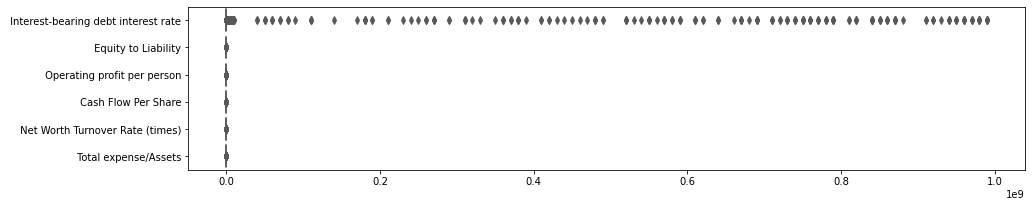


**** Displaying percentile of columns that are skewed from 7 to 10 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


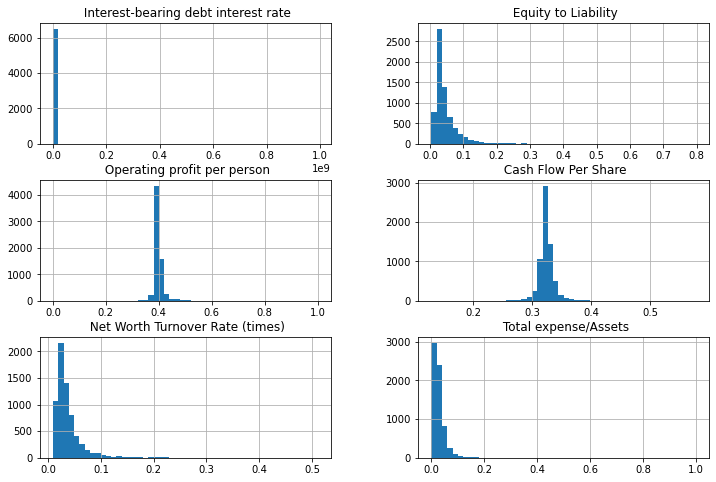



 **********Outliers beyond 0.95 percentile **********


2 minority class
219 columns are manipulated 

SKEWNESS

*******************************************************AFTER*******************************************************


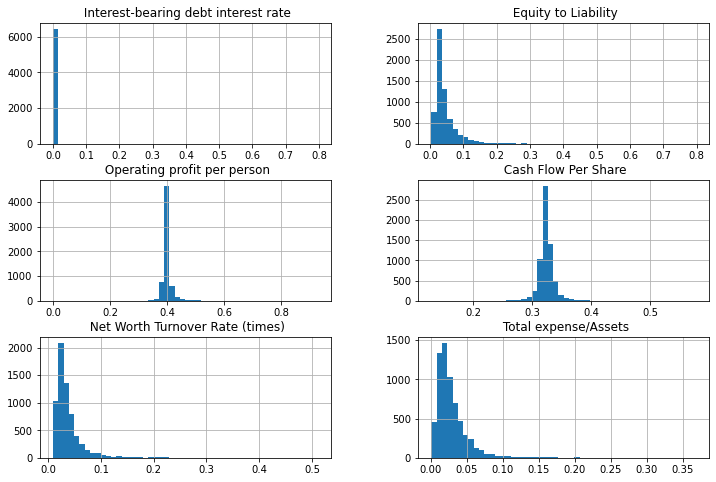

**** Box plot after removal of outliers****


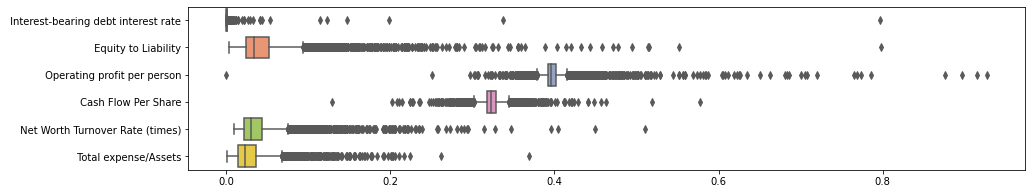


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Interest-bearing debt interest rate    0.000131
 Equity to Liability                    0.001799
 Operating profit per person            0.000788
 Cash Flow Per Share                    0.000220
 Net Worth Turnover Rate (times)        0.000952
 Total expense/Assets                   0.000573
dtype: float64

In [1340]:
list_col=print_skewness_and_handle_outlier(7,10,bank_data_stage_1,'+',.95,True)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

# Analysing Features having skewness from 4 to 7

****Displaying first 5 rows of features that are having it skewness from 4 to 7****


Net Value Per Share (B)   Persistent EPS in the Last Four Seasons
0                  0.147950                                  0.169141
1                  0.182251                                  0.208944
2                  0.177911                                  0.180581
3                  0.154187                                  0.193722
4                  0.167502                                  0.212537

**** Box plot before removal of outliers****


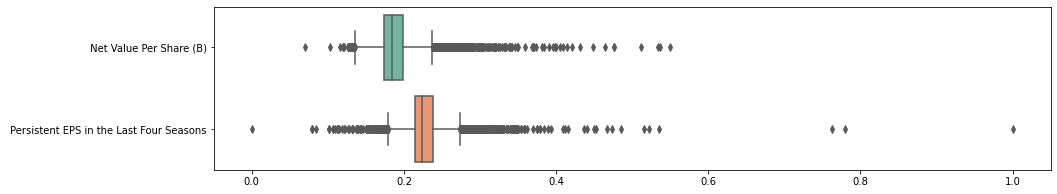


**** Displaying percentile of columns that are skewed from 4 to 7 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


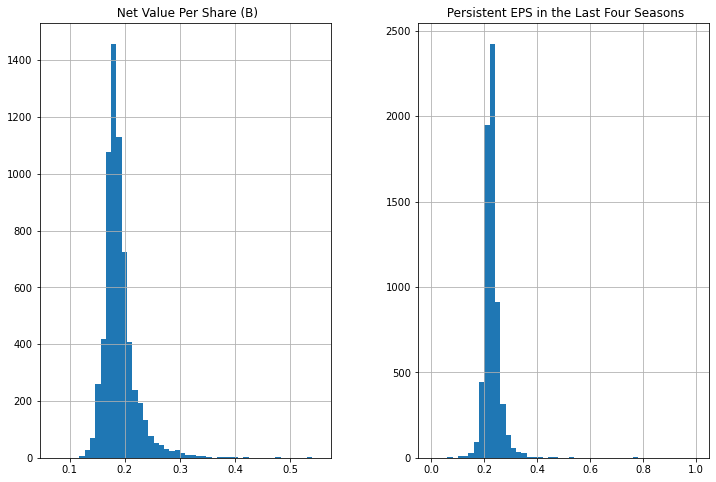



 **********Outliers beyond 0.8 percentile **********


0 minority class
1 columns are manipulated 

SKEWNESS

*******************************************************AFTER*******************************************************


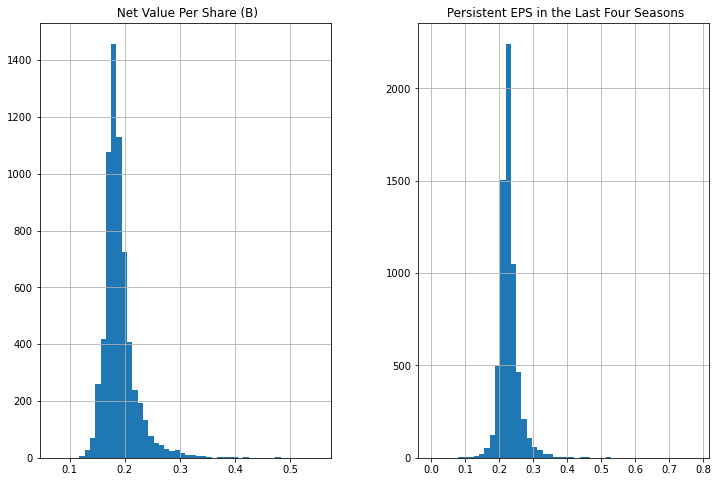

**** Box plot after removal of outliers****


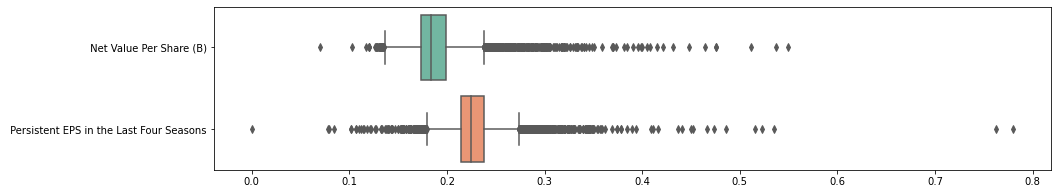


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Net Value Per Share (B)                    0.000971
 Persistent EPS in the Last Four Seasons    0.000943
dtype: float64

In [1341]:
list_col=print_skewness_and_handle_outlier(4,7,bank_data_stage_1,'+',.8,True)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

<AxesSubplot:xlabel=' Operating Gross Margin', ylabel='Count'>

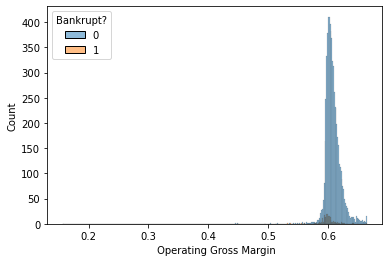

In [1358]:
condi1=(bank_data_stage_1[' Operating Gross Margin']>bank_data_stage_1[' Operating Gross Margin'].quantile(0.1))
condi2=bank_data_stage_1['Bankrupt?']==1
bank_data_stage_1[condi1 & condi2]
sns.histplot(data=bank_data_stage_1,x=' Operating Gross Margin',hue='Bankrupt?')

# Analysing Features having skewness from -10 to -2

****Displaying first 5 rows of features that are having it skewness from -10 to -2****


Operating Gross Margin   Cash Flow to Equity  \
0                 0.601457              0.312905   
1                 0.610235              0.314163   
2                 0.601450              0.314515   
3                 0.583541              0.302382   
4                 0.598783              0.311567   

    Retained Earnings to Total Assets  
0                            0.903225  
1                            0.931065  
2                            0.909903  
3                            0.906902  
4                            0.913850

**** Box plot before removal of outliers****


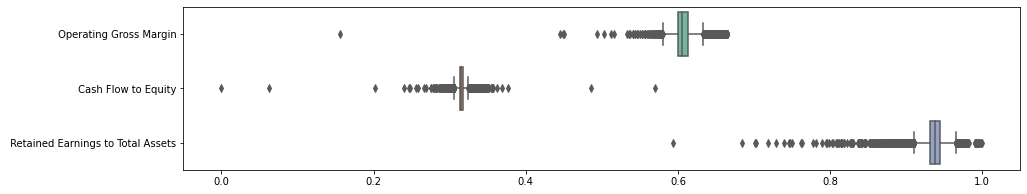


**** Displaying percentile of columns that are skewed from -10 to -2 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


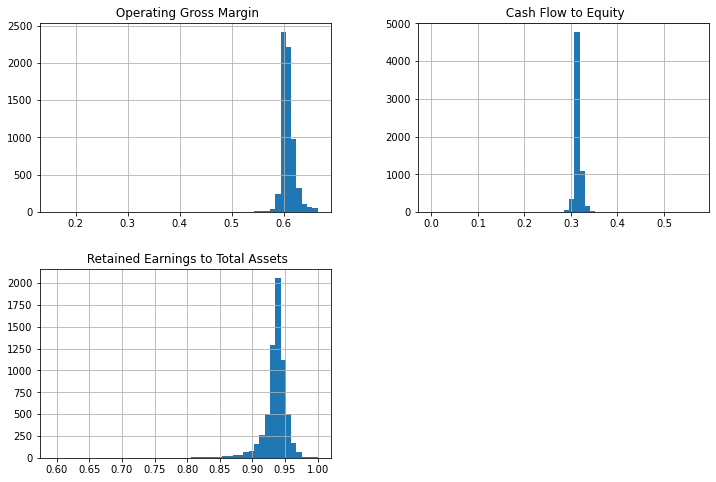



 **********Outliers beyond 0.01 percentile **********


1 minority class
1 rows of specific column  are imputed to median value 
0 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


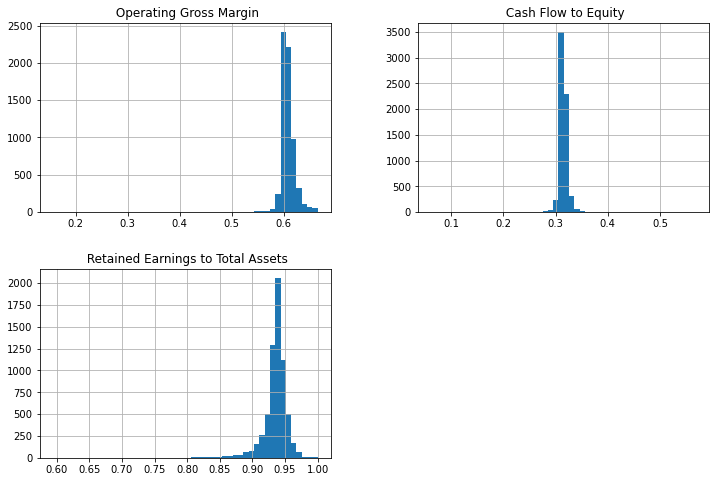

**** Box plot after removal of outliers****


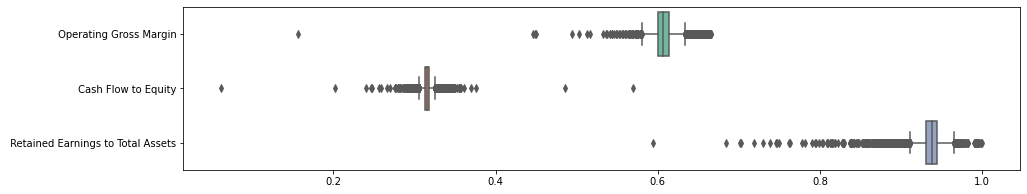


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Operating Gross Margin               0.000204
 Cash Flow to Equity                  0.000091
 Retained Earnings to Total Assets    0.000438
dtype: float64

In [1360]:
list_col=print_skewness_and_handle_outlier(-10,-2,bank_data_stage_1,'-',.01)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

****Displaying first 5 rows of features that are having it skewness from -20 to -10****


Inventory/Working Capital   Interest Expense Ratio  \
0                    0.276920                 0.629951   
1                    0.289642                 0.635172   
2                    0.277456                 0.629631   
3                    0.276580                 0.630228   
4                    0.287913                 0.636055   

    After-tax Net Profit Growth Rate  \
0                           0.688979   
1                           0.689693   
2                           0.689463   
3                           0.689110   
4                           0.689697   

    Interest Coverage Ratio (Interest expense to EBIT)   No-credit Interval  
0                                           0.564050               0.622879  
1                                           0.570175               0.623652  
2                                           0.563706               0.623841  
3                                           0.564663               0.622929  
4                                           0.575617               0.623521

**** Box plot before removal of outliers****


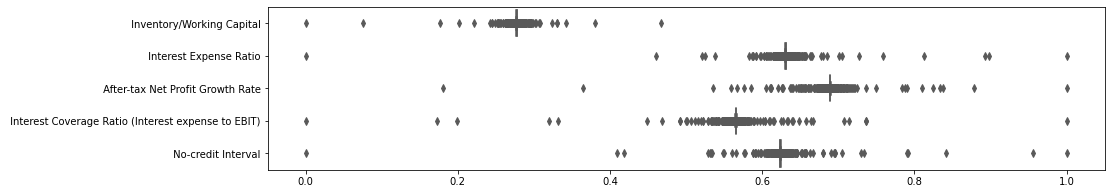


**** Displaying percentile of columns that are skewed from -20 to -10 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


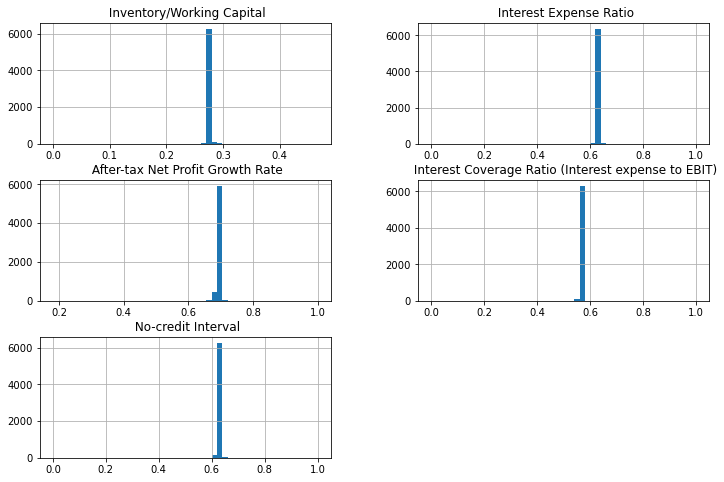



 **********Outliers beyond 0.01 percentile **********


0 minority class
0 rows of specific column  are imputed to median value 
4 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


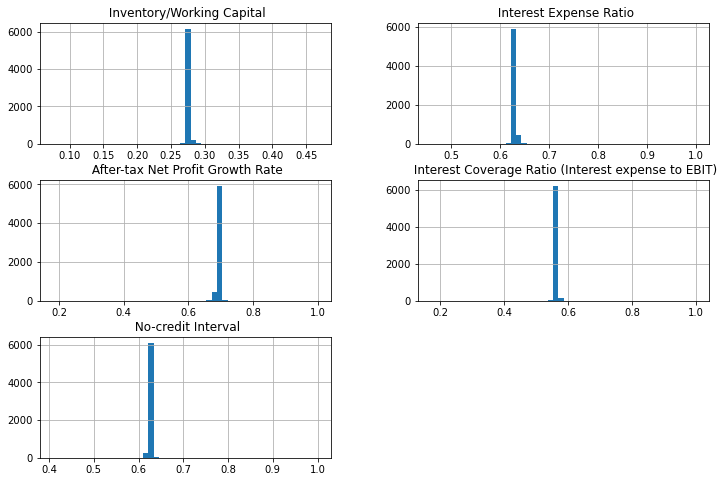

**** Box plot after removal of outliers****


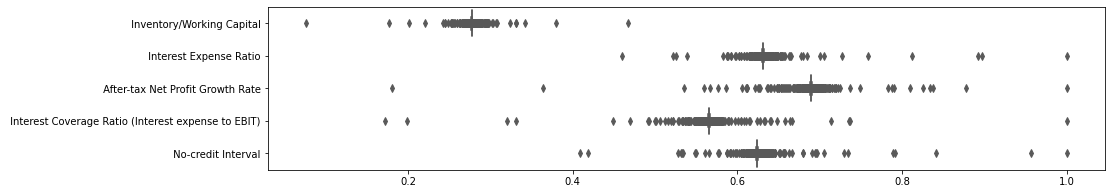


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Inventory/Working Capital                             0.000023
 Interest Expense Ratio                                0.000071
 After-tax Net Profit Growth Rate                      0.000122
 Interest Coverage Ratio (Interest expense to EBIT)    0.000131
 No-credit Interval                                    0.000093
dtype: float64

In [1370]:
list_col=print_skewness_and_handle_outlier(-20,-10,bank_data_stage_1,'-',.01,True)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

# Analysing Features having skewness from -40 to - 20

****Displaying first 5 rows of features that are having it skewness from -40 to -20****


Net Income to Stockholder's Equity  \
0                             0.827890   
1                             0.839969   
2                             0.836774   
3                             0.834697   
4                             0.839973   

    Non-industry income and expenditure/revenue   Operating Profit Rate  \
0                                      0.302646                0.998969   
1                                      0.303556                0.998946   
2                                      0.302035                0.998857   
3                                      0.303350                0.998700   
4                                      0.303475                0.998973   

    Working capitcal Turnover Rate  
0                         0.593831  
1                         0.593916  
2                         0.594502  
3                         0.593889  
4                         0.593915

**** Box plot before removal of outliers****


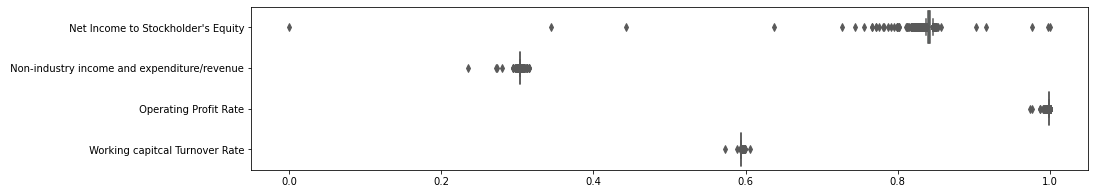


**** Displaying percentile of columns that are skewed from -40 to -20 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


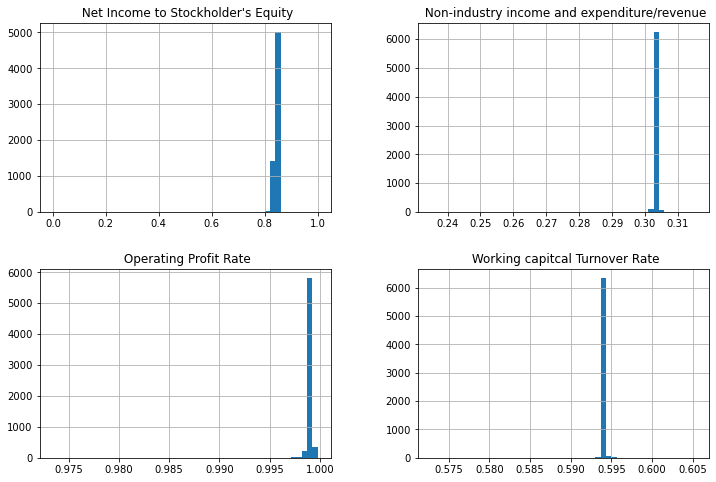



 **********Outliers beyond 0.01 percentile **********


1 minority class
1 rows of specific column  are imputed to median value 
0 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


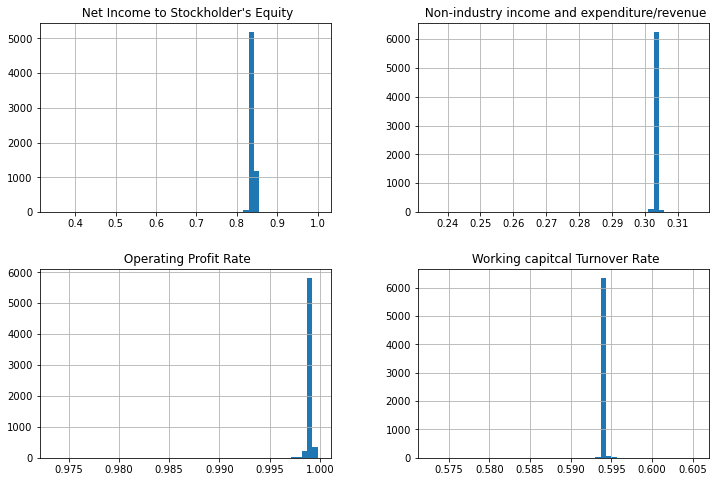

**** Box plot after removal of outliers****


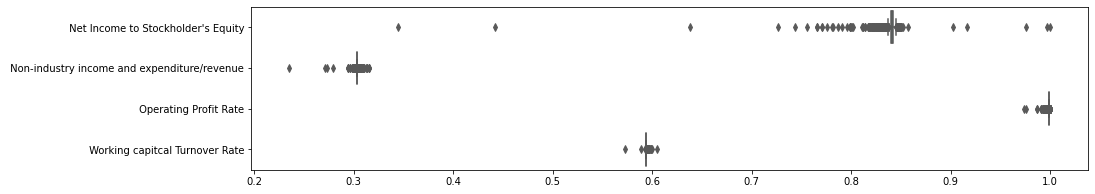


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Net Income to Stockholder's Equity             2.115722e-04
 Non-industry income and expenditure/revenue    1.447705e-06
 Operating Profit Rate                          3.583527e-07
 Working capitcal Turnover Rate                 1.313599e-07
dtype: float64

In [1374]:
list_col=print_skewness_and_handle_outlier(-40,-20,bank_data_stage_1,'-',.01)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

# Analysing Features having skewness from -85 to -50

****Displaying first 5 rows of features that are having it skewness from -85 to -50****


Continuous Net Profit Growth Rate
0                            0.217535
1                            0.217620
2                            0.217601
3                            0.217568
4                            0.217626

**** Box plot before removal of outliers****


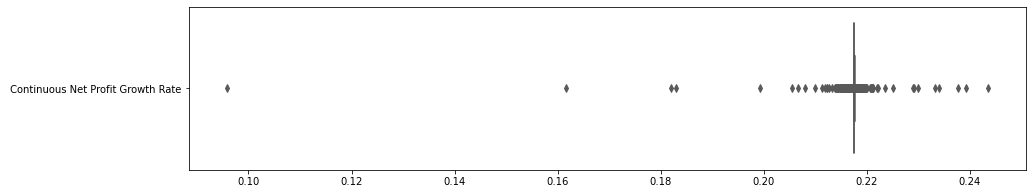


**** Displaying percentile of columns that are skewed from -85 to -50 ****

*******************************************************BEFORE*******************************************************



SKEWNESS

*******************************************************BEFORE*******************************************************


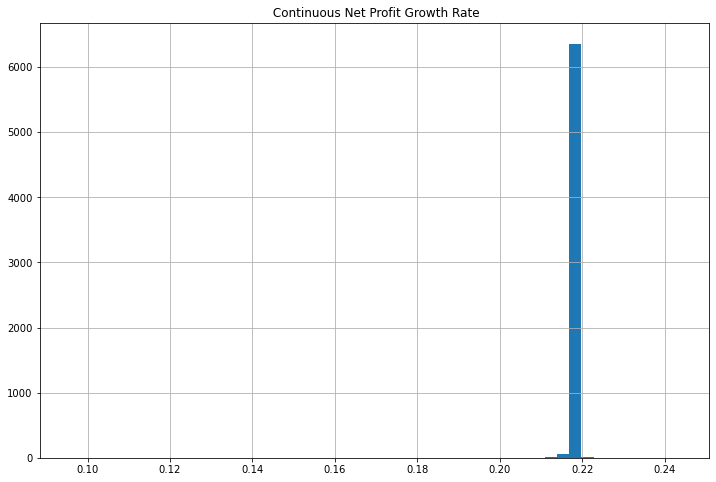



 **********Outliers beyond 0.01 percentile **********


0 minority class
0 rows of specific column  are imputed to median value 
0 rows are removed 

SKEWNESS

*******************************************************AFTER*******************************************************


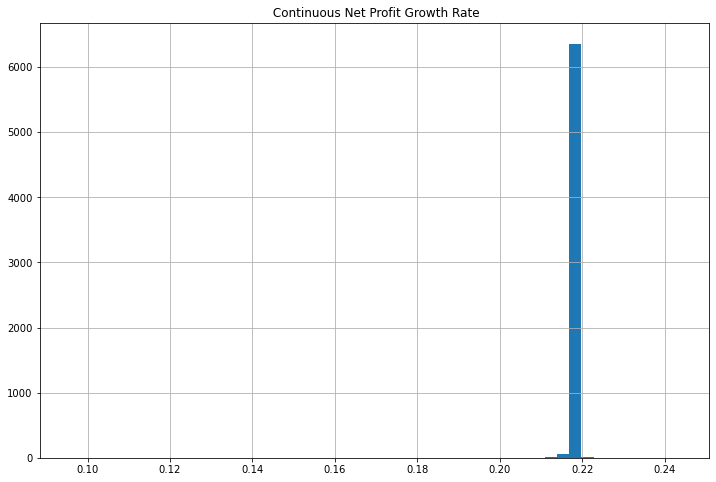

**** Box plot after removal of outliers****


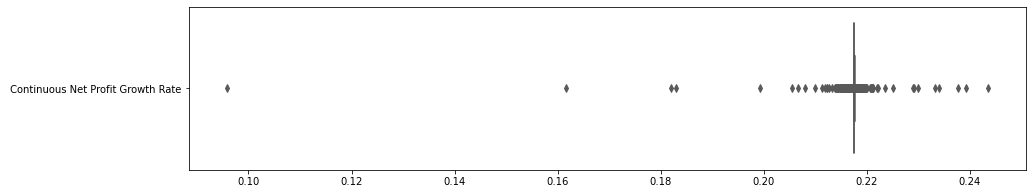


PERCENTILE
*******************************************************AFTER*******************************************************


Displaying Variance 


 Continuous Net Profit Growth Rate    0.000004
dtype: float64

In [1384]:
list_col=print_skewness_and_handle_outlier(-85,-50,bank_data_stage_1,'-',.01,True)

print("Displaying Variance ")
bank_data_stage_1[list_col].var()

In [670]:
bank_data_stage_1.drop({1424, 2344, 2440, 2460, 2470, 2490, 2496, 2499, 2735, 4447, 6391})

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       Operating Gross Margin   Operating Profit Rate  \
0                    0.601457                0.998969   
1                    0.610235                0.998946   
2                    0.601450                0.998857   
3                    0.583541                0.998700   
4                    0.598783                0.998973   
...                       ...                     ...   
6814                 0.604455                0.998992   
6815                 0.598308                0.998992   
6816                 0.610444                0.998984   
6817                 0.607850                0.999074   
6818                 0.627409                0.998080   

       Non-industry income and expenditure/revenue   Operating Expense Rate  \
0                                         0.302646             1.256969e-04   
1                                         0.303556             2.897851e-04   
2                                         0.302035             2.361297e-04   
3                                         0.303350             1.078888e-04   
4                                         0.303475             7.890000e+09   
...                                            ...                      ...   
6814                                      0.303510             1.510213e-04   
6815                                      0.303520             5.220000e+09   
6816                                      0.303512             2.509312e-04   
6817                                      0.303498             1.236154e-04   
6818                                      0.313415             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
0                               0.000000e+00         0.458143   
1                               0.000000e+00         0.461867   
2                               2.550000e+07         0.458521   
3                               0.000000e+00         0.465705   
4                               0.000000e+00         0.462746   
...                                      ...              ...   
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
0                             7.250725e-04       0.000000   
1                             6.470647e-04       0.000000   
2                             7.900790e-04       0.000000   
3                             4.490449e-04       0.000000   
4                             6.860686e-04       0.000000   
...                                    ...            ...   
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.18129

In [26]:
from sklearn.feature_selection import f_classif,SelectKBest 
fs = SelectKBest(score_func=f_classif,k=50)
# Apply feature selection
fs.fit(bank_data_stage_1.drop("Bankrupt?",axis=1),bank_data_stage_1['Bankrupt?'])

SelectKBest(k=50)

In [27]:
fs.get_support()

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True])

In [28]:
feat_score=pd.DataFrame(data={'score':fs.scores_,'p_value':np.round(fs.pvalues_,4)},index=[x for x in bank_data_stage_1.columns if x not in ['Bankrupt?']]).sort_values("score",ascending=False)
feat_score.reset_index()

index       score  p_value
0    ROA(C) before interest and depreciation befor...  497.535121   0.0000
1                                    Net worth/Assets  455.091151   0.0000
2                                        Debt ratio %  455.091151   0.0000
3             Persistent EPS in the Last Four Seasons  345.267517   0.0000
4                   Retained Earnings to Total Assets  339.411396   0.0000
5                         Current Liability to Assets  268.012458   0.0000
6                     Working Capital to Total Assets  263.987646   0.0000
7                  Net Income to Stockholder's Equity  230.861805   0.0000
8                                Borrowing dependency  219.303339   0.0000
9                 Current Liability to Current Assets  206.098157   0.0000
10                            Net Value Per Share (B)  191.736866   0.0000
11                             Working Capital/Equity  151.024877   0.0000
12                              Liability-Assets Flag  134.723414   0.0000
13                               Total expense/Assets  134.403187   0.0000
14                      Equity to Long-term Liability  134.332933   0.0000
15                                      CFO to Assets   91.981074   0.0000
16                                       Tax rate (A)   83.044337   0.0000
17                                  Cash/Total Assets   69.039813   0.0000
18                             Operating Gross Margin   68.918755   0.0000
19                        Operating profit per person   59.271141   0.0000
20                          Quick Assets/Total Assets   51.249983   0.0000
21                                Equity to Liability   47.343683   0.0000
22                             Cash/Current Liability   41.643607   0.0000
23                                Cash Flow Per Share   41.209620   0.0000
24        Inventory and accounts receivable/Net value   38.850664   0.0000
25                    Fixed Assets Turnover Frequency   36.339832   0.0000
26                                     Cash flow rate   35.877044   0.0000
27                          Cash Flow to Total Assets   34.008391   0.0000
28                   Contingent liabilities/Net worth   34.007305   0.0000
29                               Total Asset Turnover   31.588910   0.0000
30                             Fixed Assets to Assets   30.123582   0.0000
31                              Net Value Growth Rate   29.219210   0.0000
32                                Cash Flow to Equity   23.460434   0.0000
33                                Cash Reinvestment %   18.019367   0.0000
34                        Current Assets/Total Assets   13.723824   0.0002
35                            Total Asset Growth Rate   13.484166   0.0002
36                             Cash Flow to Liability   12.701673   0.0004
37                                 Revenue per person   10.771201   0.0010
38                   After-tax Net Profit Growth Rate    9.745541   0.0018
39                          Total assets to GNP price    8.410977   0.0037
40                          Quick Asset Turnover Rate    4.545468   0.0330
41                                        Quick Ratio    4.283205   0.0385
42              Research and development expense rate    4.005214   0.0454
43                Interest-bearing debt interest rate    3.627845   0.0569
44                    Net Worth Turnover Rate (times)    3.033236   0.0816
45                      Current Liabilities/Liability    2.953231   0.0858
46                                 Cash Turnover Rate    2.218106   0.1364
47               Long-term fund suitability ratio (A)    1.952151   0.1624
48               Total Asset Return Growth Rate Ratio    1.937815   0.1640
49        Non-industry income and expenditure/revenue    1.877343   0.1707
50                       Operating Profit Growth Rate    1.568725   0.2104
51                         Total debt/Total net worth    1.033780   0.3093
52                        Current Asset Turnover Rate    0.970175   0.324

- Ordering features which respect to the rank given from SelectKBest function

<AxesSubplot:xlabel=' ROA(C) before interest and depreciation before interest', ylabel=' Debt ratio %'>

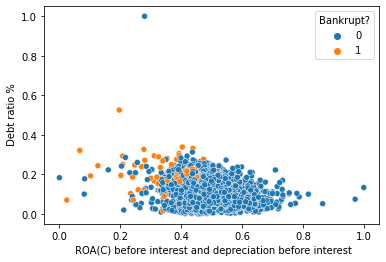

In [29]:
sns.scatterplot(data=bank_data_stage_1,x=' ROA(C) before interest and depreciation before interest',y=" Debt ratio %",hue="Bankrupt?")

<AxesSubplot:xlabel=' ROA(C) before interest and depreciation before interest', ylabel=' Debt ratio %'>

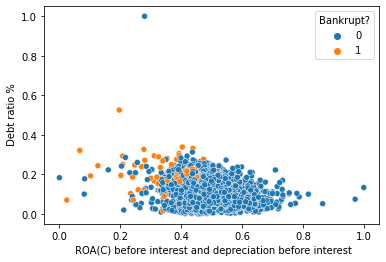

In [30]:
sns.scatterplot(data=bank_data_stage_1,x=' ROA(C) before interest and depreciation before interest',y=" Debt ratio %",hue="Bankrupt?")

In [31]:
bank_data_stage_1

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       Operating Gross Margin   Operating Profit Rate  \
0                    0.601457                0.998969   
1                    0.610235                0.998946   
2                    0.601450                0.998857   
3                    0.583541                0.998700   
4                    0.598783                0.998973   
...                       ...                     ...   
6814                 0.604455                0.998992   
6815                 0.598308                0.998992   
6816                 0.610444                0.998984   
6817                 0.607850                0.999074   
6818                 0.627409                0.998080   

       Non-industry income and expenditure/revenue   Operating Expense Rate  \
0                                         0.302646             1.256969e-04   
1                                         0.303556             2.897851e-04   
2                                         0.302035             2.361297e-04   
3                                         0.303350             1.078888e-04   
4                                         0.303475             7.890000e+09   
...                                            ...                      ...   
6814                                      0.303510             1.510213e-04   
6815                                      0.303520             5.220000e+09   
6816                                      0.303512             2.509312e-04   
6817                                      0.303498             1.236154e-04   
6818                                      0.313415             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
0                               0.000000e+00         0.458143   
1                               0.000000e+00         0.461867   
2                               2.550000e+07         0.458521   
3                               0.000000e+00         0.465705   
4                               0.000000e+00         0.462746   
...                                      ...              ...   
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
0                             7.250725e-04       0.000000   
1                             6.470647e-04       0.000000   
2                             7.900790e-04       0.000000   
3                             4.490449e-04       0.000000   
4                             6.860686e-04       0.000000   
...                                    ...            ...   
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.18129

In [32]:
bank_data_stage_2=bank_data_stage_1.copy()

In [33]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in bank_data_stage_2:
    new_df = outliers_removal(bank_data_stage_2[col],str(col),bank_data_stage_2)
    # print(col)




Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.6004446590466855 | Quartile 75: 0.613914152697502
iqr: 0.01346949365081651
Cut Off: 0.020204240476224766
 Operating Gross Margin Lower: 0.5802404185704608
 Operating Gross Margin Upper: 0.6341183931737269
 Operating Gross Margin outliers for close to bankruptcy cases: 320
-----------------------------------------

In [34]:
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5 and col!="Bankrupt?":
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

data_norm = log_trans(new_df)

In [35]:
display_quatile_dist(new_df,feat_score.index)

In [36]:
bank_data_stage_4=data_norm.copy()
# bank_data_stage_4=new_df.copy()

In [37]:
display_quatile_dist(bank_data_stage_4,feat_score.index)

In [38]:
bank_data_stage_4['Bankrupt?']=np.where(bank_data_stage_4["Bankrupt?"]< .4,0,1)

In [39]:
X_=bank_data_stage_4[feat_score.index[:25]]
y_=bank_data_stage_4['Bankrupt?']
# X,y=ADASYN(random_state=42,).fit_resample(X_,y_)
X,y=X_,y_

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [288]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9684, 60), (1254, 60), (9684,), (1254,))